<a href="https://colab.research.google.com/github/brunoras/churn_analise/blob/main/Churn_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de Churn de uma Companhia Telefônica

Não há métrica mais importante para uma empresa acompanhar do que o churn. A taxa na qual os clientes estão deixando sua empresa e levando seu dinheiro para outro lugar. O churn pode ser impulsionado por vários fatores, e mesmo pequenos aumentos mensais na porcentagem de churn podem ser prejudiciais ao planejamento, portanto, é vital entender quais fatores fazem o cliente cancelar sua assinatura.

Para ser franco: O churn é caro para o negócio. Uma alta taxa de rotatividade força a empresa a competir com o estresse e a dificuldade de trazer novos clientes suficientes para tapar os buracos no navio. Mesmo aumentos aparentemente pequenos e de um dígito na taxa de churn (%) podem rapidamente ter um grande efeito negativo na capacidade de crescimento da empresa. Além disso, altas taxas de churn são mais propensas a se agravar com o tempo.

Embora você possa tentar superar seu churn concentrando-se em trazer novos clientes, você só pode reduzir ativamente o churn concentrando-se nas áreas em que está perdendo clientes. Uma empresa que está perdendo clientes devido a uma estratégia de preços ruim precisará de uma estratégia de melhoria diferente, devido a um programa de suporte ao cliente disfuncional.

Para descobrir de onde vem o churn de nossa empresa de telefonia, primeiramente faremos uma análise exploratória para criar heurísticas e depois criaremos e otimizaremos modelos de Machine Learning para aprendermos onde mudar e onde investir para reduzir o churn.

Os dados foram extraídos do [Kaggle](https://www.kaggle.com/abhinav89/telecom-customer/discussion/39293) contendo informações de 100 mil clientes de telefonia, diferenciados por um ID fictício e cujo alvo é o churn, que tem uma instância entre 31-60 dias após a data de observação.

Os significados das 100 variáveis foram rertiradas deste [artigo](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.489.5495&rep=rep1&type=pdf), e os valores das variáveis categóricas foram deduzidas da melhor forma possível, baseado no idioma Inglês.

## Importações

In [195]:
# Utilitários
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Imputação de valures nulos e remoção de outliers
from sklearn.impute import SimpleImputer
from scipy import stats

**O nosso dataset contém 100 colunas. Vamos separar apenas as variáveis que usaremos nesta análise por categorias:**

- **Financeiro**
  - **rev_Mean** Receita mensal média (valor da cobrança)
  - **totmrc_Mean** Cobrança recorrente mensal total média
  - **ovrrev_Mean** Média de receita excedente
  - **vceovr_Mean** Receita média de excesso de voz
  - **datovr_Mean** Receita média de excesso de dados
  - **asl_flag** Limite de gastos da conta
  - **totrev** Receita total
  - **adjrev** Faturamento ajustado da receita total ao longo da vida do cliente
  - **adjmou** Faturamento ajustado do total de minutos de uso ao longo da vida útil do cliente
  - **adjqty** Faturamento ajustado do número total de chamadas ao longo da vida do cliente
  - **avgrev** Receita mensal média ao longo da vida do cliente
  - **avg3rev** Receita mensal média nos três meses anteriores
  - **avg6rev** Receita mensal média nos seis meses anteriores
  - **income** Renda estimada
  - **creditcd** Indicador de cartão de crédito

- **Chamadas**
  - *Geral*
    - **mou_Mean** Número médio de minutos mensais de uso
    - **da_Mean** Número médio de chamadas assistidas pela diretoria
    - **ovrmou_Mean** Média de minutos excedentes de uso
    - **roam_Mean** Número médio de chamadas em roaming
    - **change_mou** Alteração percentual nos minutos mensais de uso em relação à média dos três meses anteriores
    -  **inonemin_Mean** Número médio de chamadas recebidas com menos de um minuto
    - **threeway_Mean** Número médio de chamadas de conferência
    - **drop_blk_Mean** Número médio de chamadas interrompidas ou bloqueadas
    - **attempt_Mean** Número médio de tentativas de chamadas
    - **complete_Mean** Número médio de chamadas concluídas
    - **callfwdv_Mean** Número médio de chamadas encaminhadas
    - **callwait_Mean** Número médio de chamadas em espera
    - **totcalls** Número total de chamadas ao longo da vida do cliente
    - **totmou** Total de minutos de uso ao longo da vida do cliente
    - **avgmou** Média mensal de minutos de uso ao longo da vida do cliente
    - **avgqty** Número médio mensal de chamadas ao longo da vida do cliente
    - **avg3mou** Média mensal de minutos de uso nos três meses anteriores
    - **avg3qty** Número médio mensal de chamadas nos últimos três meses
    - **avg6mou** Média mensal de minutos de uso nos últimos seis meses
    - **avg6qty** Número médio mensal de chamadas nos últimos seis meses

  - *Voz*
    - **drop_vce_Mean** Número médio de chamadas de voz perdidas
    - **blck_vce_Mean** Número médio de chamadas de voz bloqueadas
    - **unan_vce_Mean** Número médio de chamadas de voz não atendidas
    - **plcd_vce_Mean** Número médio de tentativas de chamadas de voz feitas
    - **recv_vce_Mean** Número médio de chamadas de voz recebidas
    - **comp_vce_Mean** Número médio de chamadas de voz concluídas
    - **mou_cvce_Mean** Minutos médios não arredondados de uso de chamadas de voz concluídas
    - **mou_rvce_Mean** Minutos médios não arredondados de uso de chamadas de voz recebidas
    - **owylis_vce_Mean** Número médio de chamadas de voz de Wi-Fi para Wi-Fi realizadas
    - **mouowylisv_Mean** Minutos médios não arredondados de uso de chamadas de voz de Wi-Fi para Wi-Fi realizadas
    - **iwylis_vce_Mean** Número médio de chamadas de voz de Wi-Fi para Wi-Fi recebidas
    - **mouiwylisv_Mean** Minutos médios não arredondados de uso de chamadas de voz de Wi-Fi para Wi-Fi recebidas
    - **peak_vce_Mean** Número médio de chamadas de voz em horário em de pico
    - **mou_peav_Mean** Minutos médios não arredondados de uso de chamadas de voz em horário de pico
    - **opk_vce_Mean** Número médio de chamadas de voz fora do horário em de pico
    - **mou_opkv_Mean** Minutos médios não arredondados de uso de chamadas de voz fora do horário de pico

  - *Dados*
    - **drop_dat_Mean** Número médio de chamadas de dados descartadas
    - **blck_dat_Mean** Número médio de chamadas de dados bloqueadas
    - **unan_dat_Mean** Número médio de chamadas de dados não atendidas
    - **plcd_dat_Mean** Número médio de tentativas de chamadas de dados feitas
    - **comp_dat_Mean** Número médio de chamadas de dados concluídas
    - **mou_cdat_Mean** Minutos médios não arredondados de uso de chamadas de dados concluídas
    - **peak_dat_Mean** Número médio de chamadas de dados em horário de pico
    - **mou_pead_Mean** Minutos médios não arredondados de uso de chamadas de dados em horário de pico
    - **opk_dat_Mean** Número médio de chamadas de dados fora do horário de pico
    - **mou_opkd_Mean** Minutos médios não arredondados de uso de chamadas de dados fora do horário de pico

  - *SAC*
    - **custcare_Mean** Número médio de chamadas de atendimento ao cliente
    - **cc_mou_Mean** Média não arredondada de minutos de uso de chamadas de atendimento ao cliente

- *Residencial*
  - **uniqsubs** Número de assinantes únicos no domicílio
  - **actvsubs** Número de assinantes ativos no domicílio
  - **area** Área geográfica
  - **ownrent** Proprietário ou locatário de aluguel
  - **lor** Tempo de residência
  - **dwlltype** Tipo de Residência
  - **marital** Estado civil
  - **adults** Número de adultos no domicílio
  - **numbcars** Número conhecido de veículos
  - **kid0_2** Criança 0 a 2 anos de idade no domicílio
  - **kid3_5** Criança de 3 a 5 anos de idade no domicílio
  - **kid6_10** Criança de 6 a 10 anos no domicílio
  - **kid11_15** Criança de 11 a 15 anos no domicílio
  - **kid16_17** Criança de 16 a 17 anos no domicílio

- *Informações Técnicas*
  - **months** Número total de meses em serviço
  - **new_cell** Novo usuário de celular
  - **refurb_new** Aparelho de telefone: recondicionado ou novo
  - **hnd_price** Preço atual do aparelho de telefone
  - **eqpdays** Número de dias (idade) do equipamento atual

- *Alvo*
  - **churn** Instância de churn entre 31-60 dias após a data de observação
  - **Customer_ID** Id do consumidor

## Leirura do Arquivo e Limpeza Inicial

In [196]:
financeiro = {'rev_Mean': 'Receita mensal média', 
              'totmrc_Mean': 'Cobrança recorrente mensal total média', 
              'ovrrev_Mean': 'Média de receita excedente', 
              'vceovr_Mean': 'Receita média de excesso de voz', 
              'datovr_Mean': 'Receita média de excesso de dados', 
              'asl_flag': 'Limite de gastos da conta', 
              'totrev': 'Receita total', 
              'adjrev': 'Faturamento ajustado da receita total ao longo da vida do cliente', 
              'adjmou': 'Faturamento ajustado do total de minutos de uso ao longo da vida útil do cliente', 
              'adjqty': 'Faturamento ajustado do número total de chamadas ao longo da vida do cliente', 
              'avgrev': 'Receita mensal média ao longo da vida do cliente', 
              'avg3rev': 'Receita mensal média nos três meses anteriores', 
              'avg6rev': 'Receita mensal média nos seis meses anteriores', 
              'income': 'Renda estimada', 
              'creditcd': 'Indicador de cartão de crédito'}

chamadas_geral = {'mou_Mean': 'Número médio de minutos mensais de uso', 
                  'da_Mean': 'Número médio de chamadas assistidas pela diretoria', 
                  'ovrmou_Mean': 'Média de minutos excedentes de uso', 
                  'roam_Mean': 'Número médio de chamadas em roaming', 
                  'change_mou': 'Alteração percentual nos minutos mensais em relação à média dos três meses', 
                  'inonemin_Mean': 'Número médio de chamadas recebidas com menos de um minuto',
                  'threeway_Mean': 'Número médio de chamadas de conferência', 
                  'drop_blk_Mean': 'Número médio de chamadas interrompidas ou bloqueadas', 
                  'attempt_Mean': 'Número médio de tentativas de chamadas', 
                  'complete_Mean': 'Número médio de chamadas concluídas', 
                  'callfwdv_Mean': 'Número médio de chamadas encaminhadas', 
                  'callwait_Mean': 'Número médio de chamadas em espera', 
                  'totcalls': 'Número total de chamadas ao longo da vida do cliente', 
                  'totmou': 'Total de minutos de uso ao longo da vida do cliente', 
                  'avgmou': 'Média mensal de minutos de uso ao longo da vida do cliente', 
                  'avgqty': 'Número médio mensal de chamadas ao longo da vida do cliente', 
                  'avg3mou': 'Média mensal de minutos de uso nos três meses anteriores', 
                  'avg3qty': 'Número médio mensal de chamadas nos últimos três meses', 
                  'avg6mou': 'Média mensal de minutos de uso nos últimos seis meses', 
                  'avg6qty': 'Número médio mensal de chamadas nos últimos seis meses'}

chamadas_voz = {'drop_vce_Mean': 'Número médio de chamadas de voz perdidas', 
                'blck_vce_Mean': 'Número médio de chamadas de voz bloqueadas', 
                'unan_vce_Mean': 'Número médio de chamadas de voz não atendidas', 
                'plcd_vce_Mean': 'Número médio de tentativas de chamadas de voz feitas', 
                'recv_vce_Mean': 'Número médio de chamadas de voz recebidas', 
                'comp_vce_Mean': 'Número médio de chamadas de voz concluídas', 
                'mou_cvce_Mean': 'Minutos médios não arredondados de uso de chamadas de voz concluídas', 
                'mou_rvce_Mean': 'Minutos médios não arredondados de uso de chamadas de voz recebidas', 
                'owylis_vce_Mean': 'Número médio de chamadas de voz de Wi-Fi para Wi-Fi realizadas', 
                'mouowylisv_Mean': 'Minutos médios não arredondados de uso de chamadas de voz de Wi-Fi para Wi-Fi realizadas', 
                'iwylis_vce_Mean': 'Número médio de chamadas de voz de Wi-Fi para Wi-Fi recebidas', 
                'mouiwylisv_Mean': 'Minutos médios não arredondados de uso de chamadas de voz de Wi-Fi para Wi-Fi recebidas', 
                'peak_vce_Mean': 'Número médio de chamadas de voz em horário em de pico', 
                'mou_peav_Mean': 'Minutos médios não arredondados de uso de chamadas de voz em horário de pico', 
                'opk_vce_Mean': 'Número médio de chamadas de voz fora do horário em de pico', 
                'mou_opkv_Mean': 'Minutos médios não arredondados de uso de chamadas de voz fora do horário de pico'}

chamadas_dados = {'drop_dat_Mean': 'Número médio de chamadas de dados descartadas', 
                  'blck_dat_Mean': 'Número médio de chamadas de dados bloqueadas', 
                  'unan_dat_Mean': 'Número médio de chamadas de dados não atendidas',
                  'plcd_dat_Mean': 'Número médio de tentativas de chamadas de dados feitas', 
                  'comp_dat_Mean': 'Número médio de chamadas de dados concluídas', 
                  'mou_cdat_Mean': 'Minutos médios não arredondados de uso de chamadas de dados concluídas', 
                  'peak_dat_Mean': 'Número médio de chamadas de dados em horário de pico', 
                  'mou_pead_Mean': 'Minutos médios não arredondados de uso de chamadas de dados em horário de pico', 
                  'opk_dat_Mean': 'Número médio de chamadas de dados fora do horário de pico', 
                  'mou_opkd_Mean': 'Minutos médios não arredondados de uso de chamadas de dados fora do horário de pico'}

chamadas_sac = {'custcare_Mean': 'Número médio de chamadas de atendimento ao cliente', 
                'cc_mou_Mean': 'Média não arredondada de minutos de uso de chamadas de atendimento ao cliente'}

residencial = {'uniqsubs': 'Número de assinantes únicos no domicílio', 
               'actvsubs': 'Número de assinantes ativos no domicílio', 
               'area': 'Área geográfica', 
               'ownrent': 'Proprietário ou locatário de aluguel', 
               'lor': 'Tempo de residência', 
               'dwlltype': 'Tipo de Residência', 
               'marital': 'Estado civil', 
               'adults': 'Número de adultos no domicílio', 
               'numbcars': 'Número conhecido de veículos', 
               'kid0_2': 'Criança 0 a 2 anos de idade no domicílio', 
               'kid3_5': ' Criança 3 a 5 anos de idade no domicílio', 
               'kid6_10': ' Criança 6 a 10 anos de idade no domicílio', 
               'kid11_15': ' Criança 11 a 15 anos de idade no domicílio', 
               'kid16_17': ' Criança 16 a 17 anos de idade no domicílio'}

info = {'months': 'Número total de meses em serviço', 
        'new_cell': 'Novo usuário de celular', 
        'refurb_new': 'Aparelho de telefone: recondicionado ou novo', 
        'hnd_price': 'Preço atual do aparelho de telefone', 
        'eqpdays': 'Número de dias (idade) do equipamento atual'}

target = {'churn': 'Instância de churn entre 31-60 dias após a data de observação', 
          'Customer_ID': 'Id do consumidor'}

variaveis = {**financeiro, **chamadas_geral, **chamadas_voz, **chamadas_dados, **chamadas_sac, **residencial, **info}

In [197]:
df = pd.read_csv('/content/drive/MyDrive/Churn Analysis/Telecom_customer_churn.csv', usecols = list(variaveis.keys()) + list(target.keys()))
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,...,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,area,refurb_new,hnd_price,ownrent,lor,dwlltype,marital,adults,income,numbcars,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,45.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,0.0,55.220000,0.0,...,0.333333,1,61,2,1,U,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,149.98999,O,15.0,S,S,1.0,4.0,3.0,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,193.333333,0.000000,1.666667,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,0.0,169.343333,0.0,...,5.666667,0,56,1,1,N,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,CHICAGO AREA,N,NaN,NaN,1.0,S,S,1.0,5.0,1.0,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,6.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,0.0,0.233333,0.0,...,0.000000,1,58,1,1,Y,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,GREAT LAKES AREA,N,29.98999,O,7.0,S,M,2.0,5.0,2.0,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,3.666667,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,0.0,5.450000,0.0,...,0.000000,0,60,1,1,Y,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,CHICAGO AREA,N,29.98999,NaN,6.0,M,M,4.0,6.0,1.0,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,137.000000,0.000000,8.666667,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,0.0,218.086667,0.0,...,0.000000,0,57,1,1,Y,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,NEW ENGLAND AREA,N,149.98999,R,5.0,M,S,1.0,6.0,1.0,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,45.333333,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.

Antes de modificarmos o dataframe para melhor modelagem, vamos analizar quanto nossa empresa deixa de faturar por mês com os clientes que não renovam a assinatura.

In [198]:
print(f"A empresa deixa de faturar ${df.loc[df['churn'] == 1]['rev_Mean'].sum():.2f} por mês.")

A empresa deixa de faturar $2870795.53 por mês.


Vamos verificar os tipos de variáveis de cada coluna.

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 84 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  drop_vce_Mean    100000 non-null  float64
 11  drop_dat_Mean    100000 non-null  float64
 12  blck_vce_Mean    100000 non-null  float64
 13  blck_dat_Mean    100000 non-null  float64
 14  unan_vce_Mean    100000 non-null  float64
 15  unan_dat_Mean    100000 non-null  float64
 16  plcd_vce_Mean    100000 non-null  float

Algumas variáreis são categóricas, vamos lidar com elas entendendo os valores únicos e substituindo por valores numéricos.

In [200]:
categoricas = df.select_dtypes(include=['object']).columns.to_list()
df[categoricas]

,new_cell,asl_flag,area,refurb_new,ownrent,dwlltype,marital,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,U,N,NORTHWEST/ROCKY MOUNTAIN AREA,N,O,S,S,U,U,U,U,U,Y
1,N,N,CHICAGO AREA,N,NaN,S,S,U,U,U,U,U,Y
2,Y,N,GREAT LAKES AREA,N,O,S,M,U,Y,U,U,U,Y
3,Y,N,CHICAGO AREA,N,NaN,M,M,Y,U,U,U,U,Y
4,Y,N,NEW ENGLAND AREA,N,R,M,S,U,U,U,U,U,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,U,N,LOS ANGELES AREA,N,O,S,M,U,U,U,Y,U,Y
99996,U,Y,LOS ANGELES AREA,N,O,S,M,U,U,Y,Y,Y,Y
99997,U,N,SOUTHWEST AREA,N,NaN,NaN,B,Y,Y,U,U,U,N
99998,U,N,SOUTHWEST AREA,N,NaN,NaN,U,U,U,U,U,U,N


Vamos avaliar cada uma das variáveis categóricas

*Novo usuário de celular*

In [201]:
df['new_cell'].unique().tolist()

['U', 'N', 'Y']

In [202]:
# Mudando U (desconhecido), N (não) e Y (sim) para 0, -1 e 1 respectivamente:
df['new_cell'] = df['new_cell'].replace(['U', 'N', 'Y'], [0, 0.5, 1])

*Limite de gastos da conta*

In [203]:
df['asl_flag'].unique().tolist()

['N', 'Y']

In [204]:
# Mudando N (não) e Y (sim) para -1 e 1 respectivamente:
df['asl_flag'] = df['asl_flag'].replace(['N', 'Y'], [0, 1])

*Área geográfica*

In [205]:
areas = df['area'].unique().tolist()
areas = [x for x in areas if str(x) != 'nan']
areas_dict = dict(zip(areas, list(range(0, len(areas)))))
areas_dict

{'ATLANTIC SOUTH AREA': 13,
 'CALIFORNIA NORTH AREA': 15,
 'CENTRAL/SOUTH TEXAS AREA': 5,
 'CHICAGO AREA': 1,
 'DALLAS AREA': 4,
 'DC/MARYLAND/VIRGINIA AREA': 16,
 'GREAT LAKES AREA': 2,
 'HOUSTON AREA': 10,
 'LOS ANGELES AREA': 18,
 'MIDWEST AREA': 7,
 'NEW ENGLAND AREA': 3,
 'NEW YORK CITY AREA': 12,
 'NORTH FLORIDA AREA': 17,
 'NORTHWEST/ROCKY MOUNTAIN AREA': 0,
 'OHIO AREA': 9,
 'PHILADELPHIA AREA': 8,
 'SOUTH FLORIDA AREA': 14,
 'SOUTHWEST AREA': 11,
 'TENNESSEE AREA': 6}

In [206]:
len(areas_dict)

19

In [207]:
# Mudando as areas para valores segundo o dicionário criado acima:
df['area'] = df['area'].replace(areas_dict)

*Aparelho de telefone: recondicionado ou novo*

In [208]:
df['refurb_new'].unique().tolist()

['N', 'R', nan]

In [209]:
# Mudando N (novo) e R (reformado) para 1 e 0 respectivamente:
df['refurb_new'] = df['refurb_new'].replace(['N', 'R'], [1, 0])

*Proprietário ou locatário de aluguel*

In [210]:
df['ownrent'].unique().tolist()

['O', nan, 'R']

In [211]:
# Mudando O (proprietário) e R (alugando) para 1 e 0 respectivamente:
df['ownrent'] = df['ownrent'].replace(['O', 'R'], [1, 0])

*Tipo de Residência*

In [212]:
df['dwlltype'].unique().tolist()

['S', 'M', nan]

In [213]:
# Mudando S (pequena) e M (média) para 0 e 1 respectivamente:
df['dwlltype'] = df['dwlltype'].replace(['S', 'M'], [0, 1])

*Estado civil*

In [214]:
df['marital'].unique().tolist()

['S', 'M', 'A', 'U', 'B', nan]

In [215]:
# Mudando U (desconhecido), S (solteira), M (casada), A (?), e B (?) para 0, 1, 2, 3 e 4 respectivamente:
df['marital'] = df['marital'].replace(['U', 'S', 'M', 'A', 'B'], [0, 1, 2, 3, 4])

*Crianças*

In [216]:
df['kid16_17'].unique().tolist()

['U', 'Y', nan]

In [217]:
# Mudando U (não) e Y (sim) para 0 e 1 respectivamente:
# Como os valores se repetem nas variáveis, vamos substituir usando um loop
kiddo = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']
for age in kiddo:
  df[age] = df[age].replace(['U', 'Y'], [0, 1])

In [218]:
df['creditcd'].unique().tolist()

['Y', 'N', nan]

In [219]:
# Mudando N (não) e Y (sim) para -1 e 1 respectivamente:
df['creditcd'] = df['creditcd'].replace(['N', 'Y'], [0, 1])

Agora todas as variáveis categóricas estão quantizadas.

In [220]:
df[categoricas]

,new_cell,asl_flag,area,refurb_new,ownrent,dwlltype,marital,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,0.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.5,0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0,1.0,1.0,NaN,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0,18.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0
99996,0.0,1,18.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
99997,0.0,0,11.0,1.0,NaN,NaN,4.0,1.0,1.0,0.0,0.0,0.0,0.0
99998,0.0,0,11.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Descrevendo e explorando cada categoria 

Primeiro, vamos fazer uma imputação simples substituindo os valores nulos pela média.

In [221]:
df.isnull().sum().sum()

219260

In [222]:
idf = df[variaveis]
simp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_simp = pd.DataFrame(simp.fit_transform(idf), index=idf.index, columns=idf.columns)
df = pd.concat([df_simp, df[target]], axis=1)

df.isnull().sum().sum()

0

Depois, removeremos os outliers com Z-score acima de 2, pois o dataset contém muitos outliers.

In [223]:
df = df[(np.abs(stats.zscore(df[variaveis])) < 2).all(axis=1)]
df.reset_index(drop=True, inplace=True)

**Criando Heurísticas**

***Financeiro***

In [224]:
df[financeiro].describe().T

,count,mean,std,min,25%,50%,75%,max
rev_Mean,26407.0,44.192034,20.010073,0.0000,30.855000,39.490000,54.4325,150.626667
totmrc_Mean,26407.0,40.659471,16.470982,-0.0825,29.990000,39.990000,49.9900,92.936667
ovrrev_Mean,26407.0,6.092733,11.786919,0.0000,0.000000,0.000000,6.8875,73.237500
vceovr_Mean,26407.0,6.030046,11.767555,0.0000,0.000000,0.000000,6.8000,73.237500
datovr_Mean,26407.0,0.060574,0.354563,0.0000,0.000000,0.000000,0.0000,6.435000
asl_flag,26407.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000
totrev,26407.0,795.496081,449.394559,21.7800,468.310000,696.810000,1013.9050,2731.340000
adjrev,26407.0,728.723018,442.589323,21.7800,402.635000,632.660000,944.5850,2637.310000
adjmou,26407.0,4720.197997,3873.645487,0.0000,1866.000000,3666.000000,6500.5000,24373.000000
adjqty,26407.0,1697.258644,1502.194679,0.0000,632.000000,1257.000000,2301.5000,10334.000000


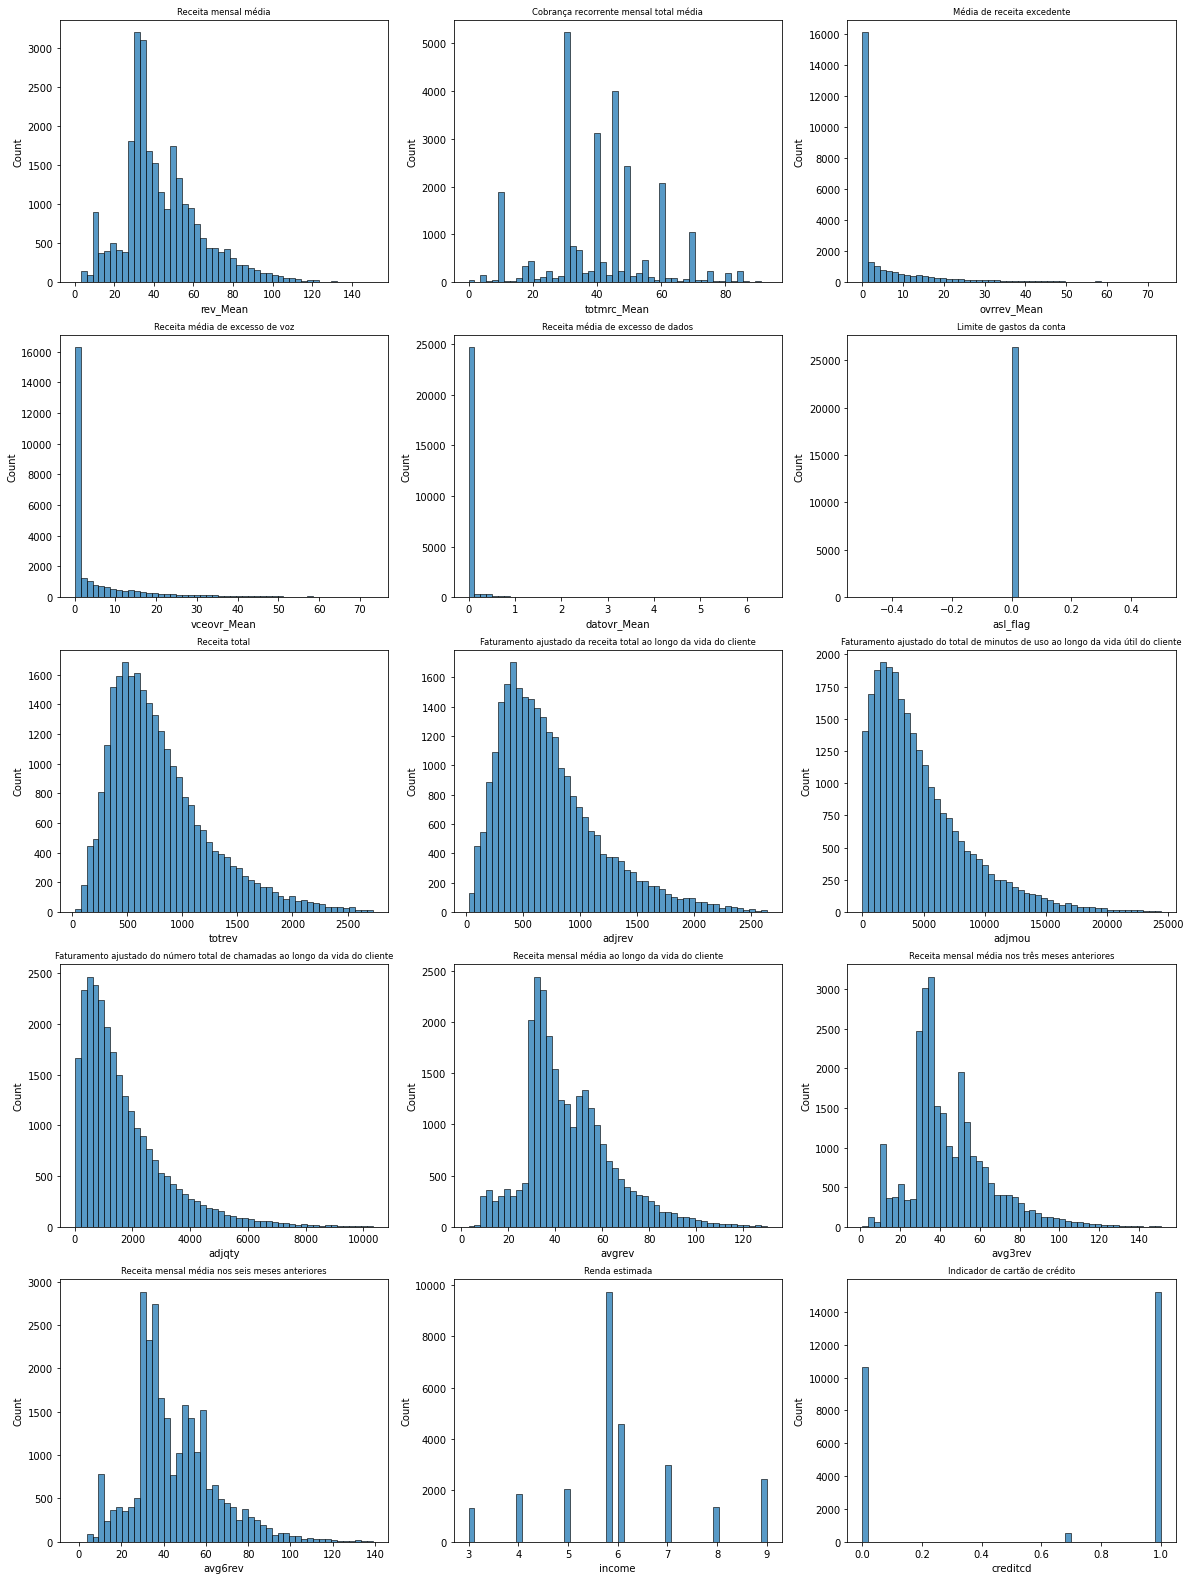

In [225]:
fig, axes = plt.subplots(5, 3, figsize=(20, 28))
for name, ax in zip(financeiro.keys(), axes.flatten()):
  ax.set_title(financeiro[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

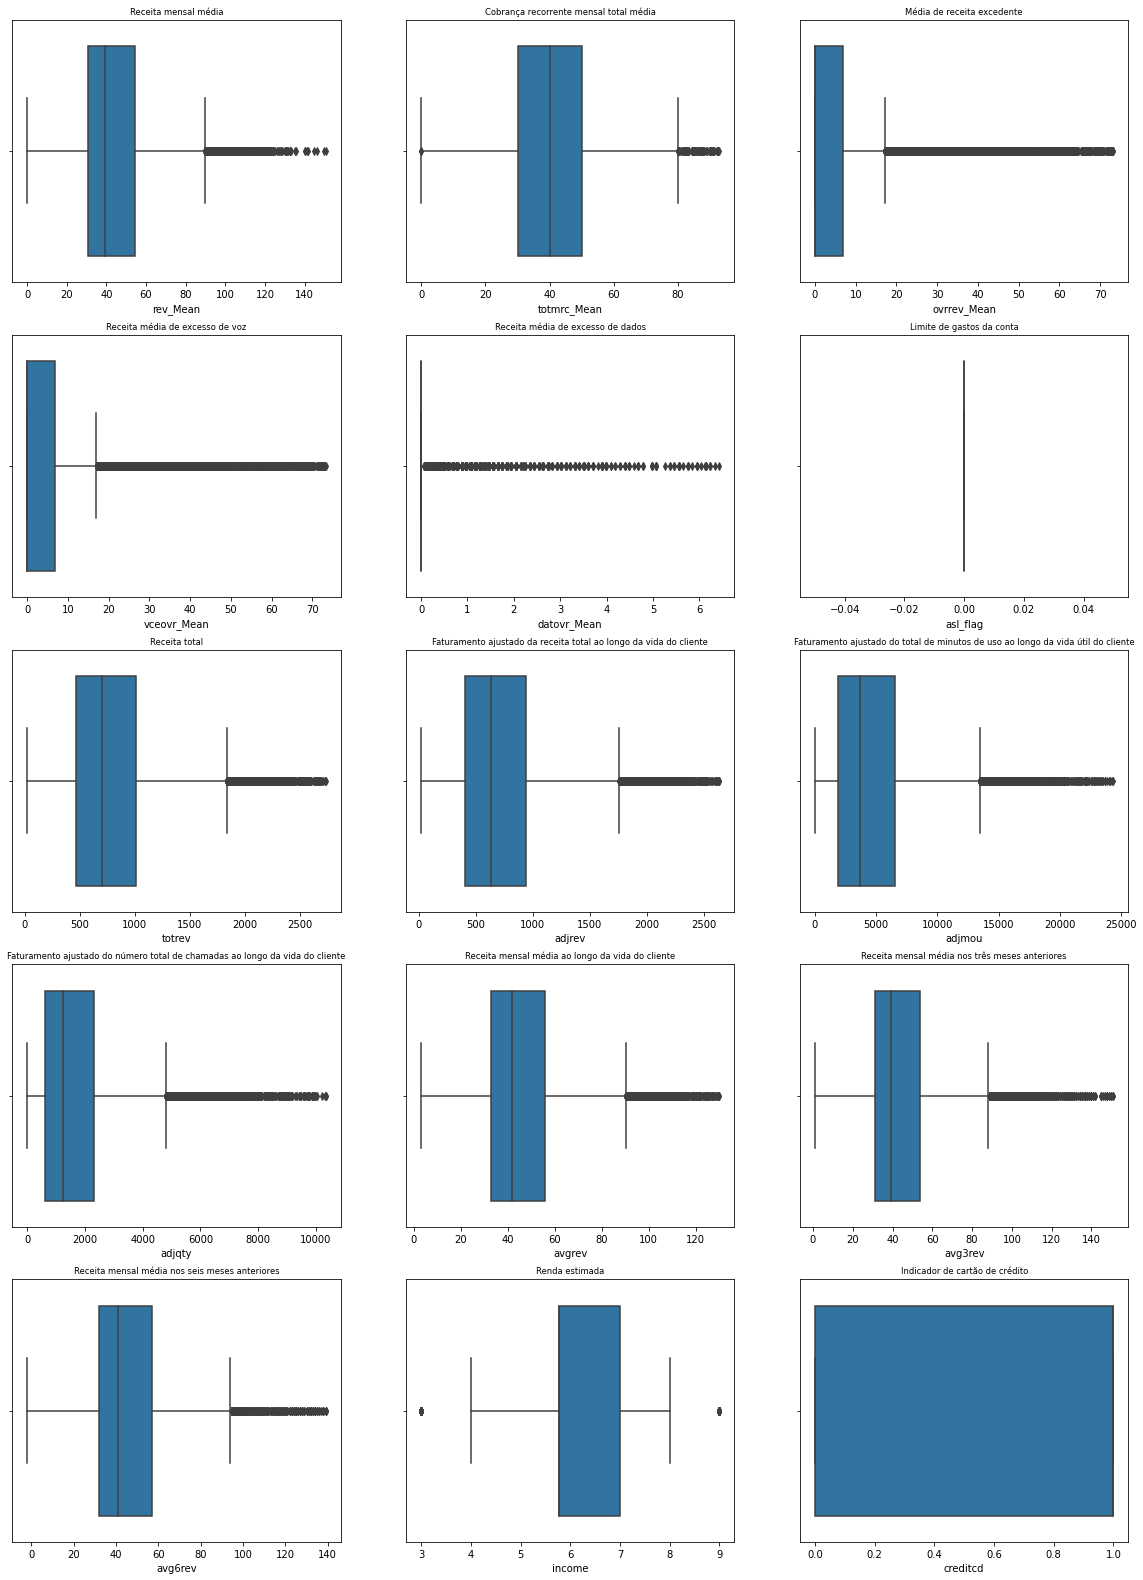

In [226]:
fig, axes = plt.subplots(5, 3, figsize=(20, 28))
for name, ax in zip(financeiro.keys(), axes.flatten()):
  ax.set_title(financeiro[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- A maioria dos clientes tem uma tarifa em torno de $55;
- A maioria dos clientes excedem pouco o valor da tarifa;
- O valor em excesso de voz é significativamente maior que o de dados;
- A maioria dos clientes tem um limite de uso;
- A receita total é o acúmulo de clientes pequenos;
- O faturamento do total de minutos e total de chamadas ao longo da vida útil do cliente mostram que cada cliente paga pouco pelos serviços da empresa;
- A receita média é constante longo da vida do cliente, nos últimos 6 meses e nos últimos 3 meses;
- A renda estimada de cada cliente sugere que há uma tendência de clientes com maior poder aquisitivo contratando nossos serviços;
- A maioria dos clientes tem cartão de crédito.

***Chamadas Geral***

In [227]:
df[chamadas_geral].describe().T

,count,mean,std,min,25%,50%,75%,max
mou_Mean,26407.0,302.017876,243.738712,0.0,110.000000,246.750000,438.750000,1532.750000
da_Mean,26407.0,0.463487,0.845433,0.0,0.000000,0.000000,0.495000,5.197500
ovrmou_Mean,26407.0,17.644530,34.236853,0.0,0.000000,0.000000,19.750000,233.750000
roam_Mean,26407.0,0.661298,2.343563,0.0,0.000000,0.000000,0.172500,30.592500
change_mou,26407.0,-6.934232,129.352456,-563.5,-61.250000,-6.000000,44.000000,533.500000
inonemin_Mean,26407.0,14.068681,19.360718,0.0,1.000000,6.666667,19.000000,141.000000
threeway_Mean,26407.0,0.118618,0.306509,0.0,0.000000,0.000000,0.000000,2.333333
drop_blk_Mean,26407.0,5.173540,5.664535,0.0,1.000000,3.333333,7.333333,40.000000
attempt_Mean,26407.0,81.928491,71.350821,0.0,24.666667,67.000000,122.666667,442.333333
complete_Mean,26407.0,62.633380,55.183459,0.0,18.333333,50.666667,94.000000,344.666667


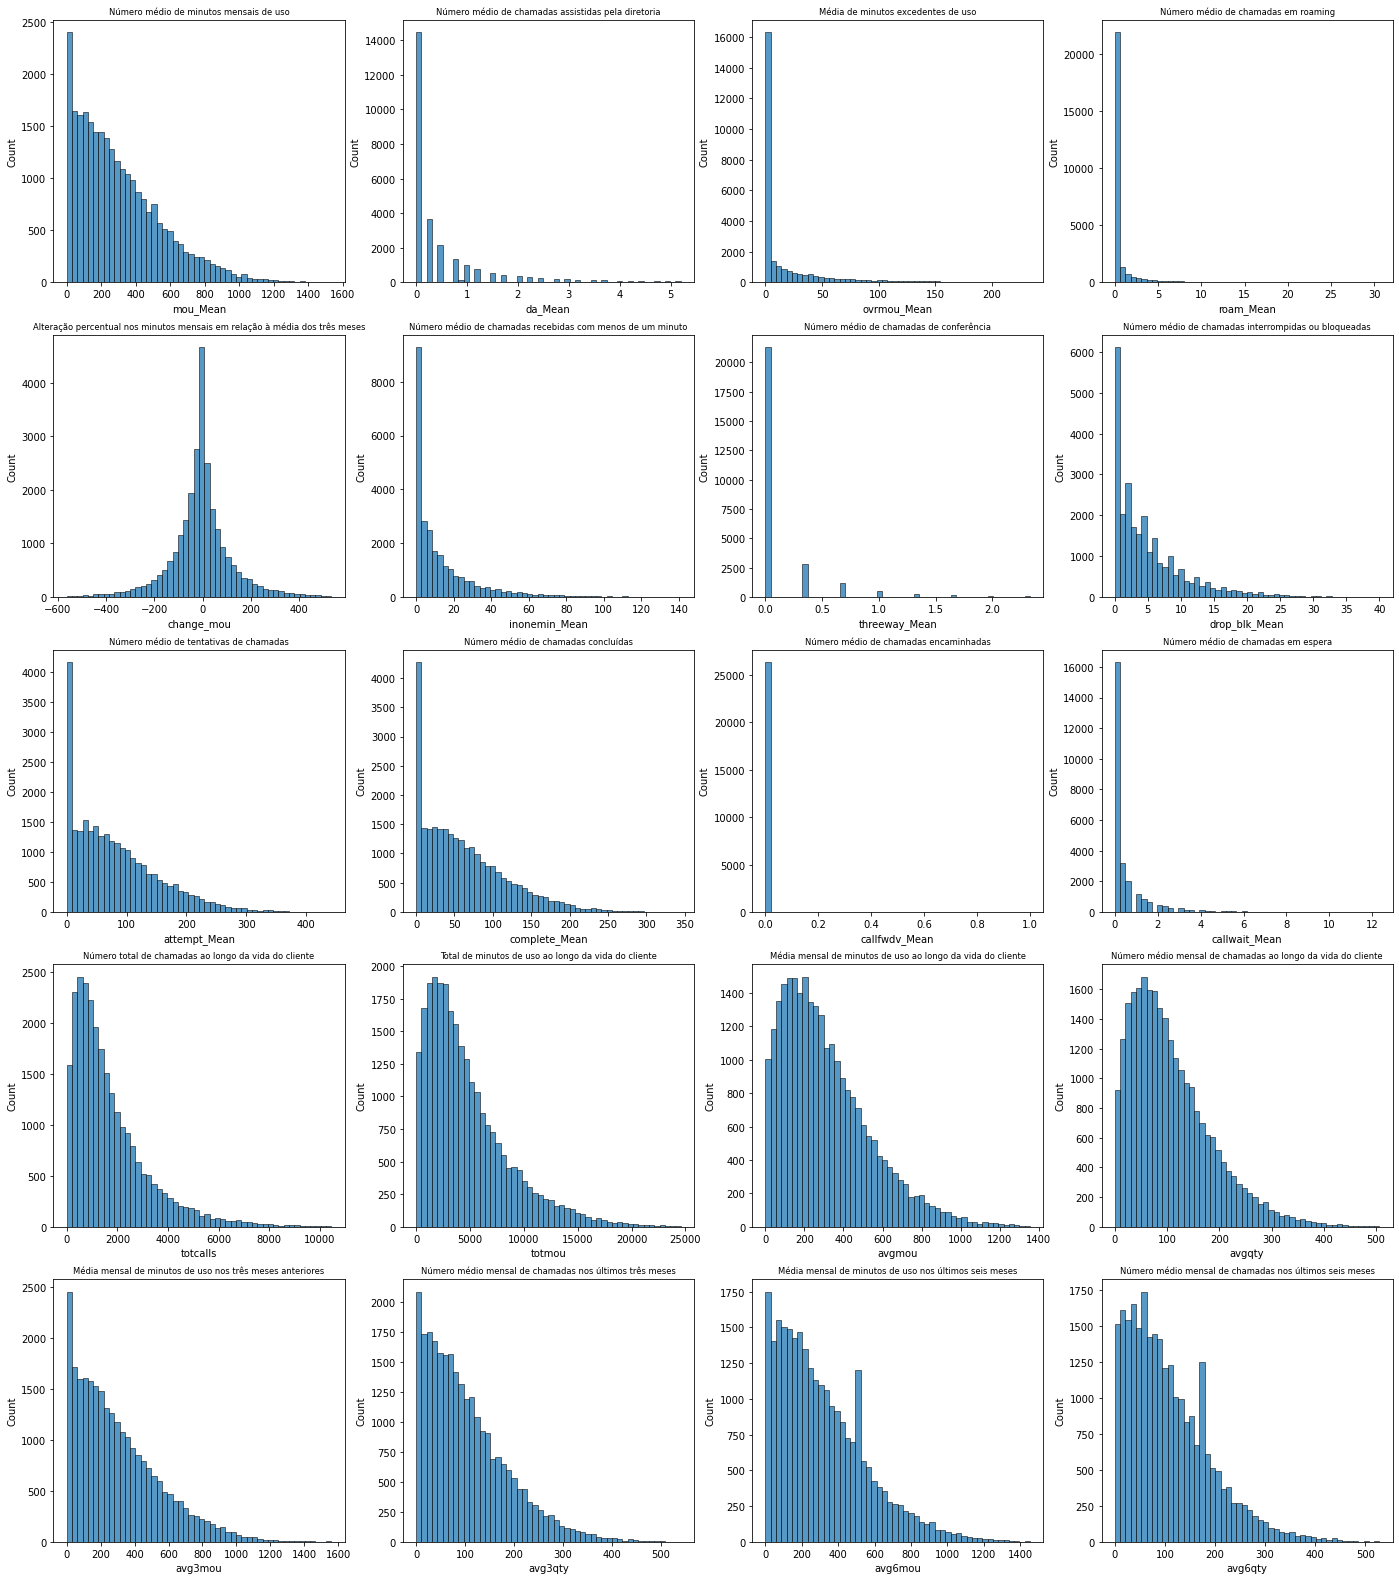

In [228]:
fig, axes = plt.subplots(5, 4, figsize=(24, 28))
for name, ax in zip(chamadas_geral.keys(), axes.flatten()):
  ax.set_title(chamadas_geral[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

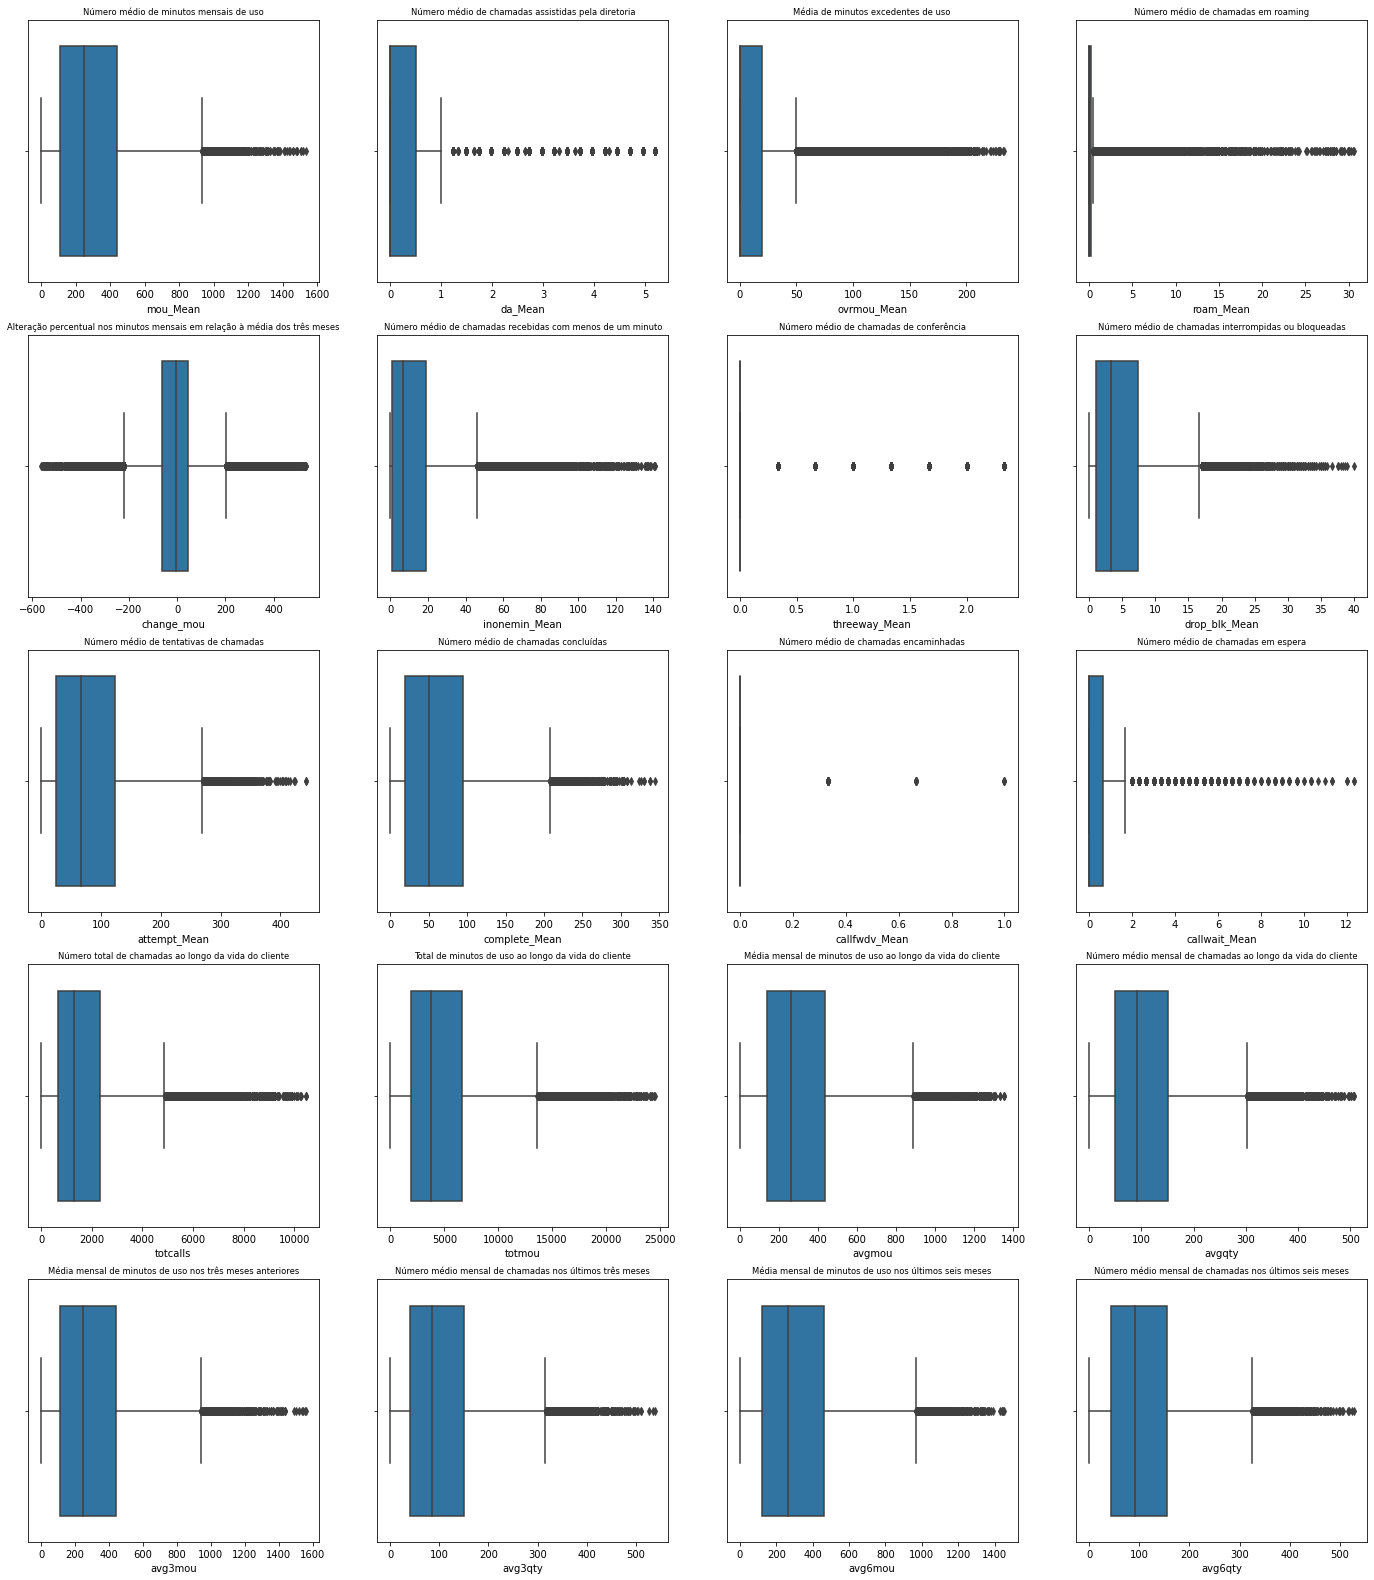

In [229]:
fig, axes = plt.subplots(5, 4, figsize=(24, 28))
for name, ax in zip(chamadas_geral.keys(), axes.flatten()):
  ax.set_title(chamadas_geral[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- O faturamento do total de minutos e total de chamadas ao longo da vida útil do cliente mostram que cada cliente paga pouco pelos serviços da empresa;

***Chamadas de Voz***

In [230]:
df[chamadas_voz].describe().T

,count,mean,std,min,25%,50%,75%,max
drop_vce_Mean,26407.0,3.277957,3.968366,0.0,0.333333,2.000000,4.666667,23.666667
blck_vce_Mean,26407.0,1.888603,3.398377,0.0,0.000000,0.666667,2.000000,25.333333
unan_vce_Mean,26407.0,14.985749,16.320649,0.0,3.000000,10.000000,21.333333,104.000000
plcd_vce_Mean,26407.0,81.806667,71.272546,0.0,24.500000,66.666667,122.333333,442.333333
recv_vce_Mean,26407.0,26.605496,33.141318,0.0,2.333333,14.333333,38.333333,224.000000
comp_vce_Mean,26407.0,62.525378,55.115224,0.0,18.333333,50.666667,94.000000,344.666667
mou_cvce_Mean,26407.0,134.271260,132.418696,0.0,30.338333,98.673333,198.905000,752.546667
mou_rvce_Mean,26407.0,53.295522,69.318014,0.0,2.590000,25.843333,77.943333,435.390000
owylis_vce_Mean,26407.0,13.657225,16.072612,0.0,1.333333,8.000000,20.000000,93.333333
mouowylisv_Mean,26407.0,14.527675,19.400496,0.0,1.065000,7.106667,19.973333,125.930000


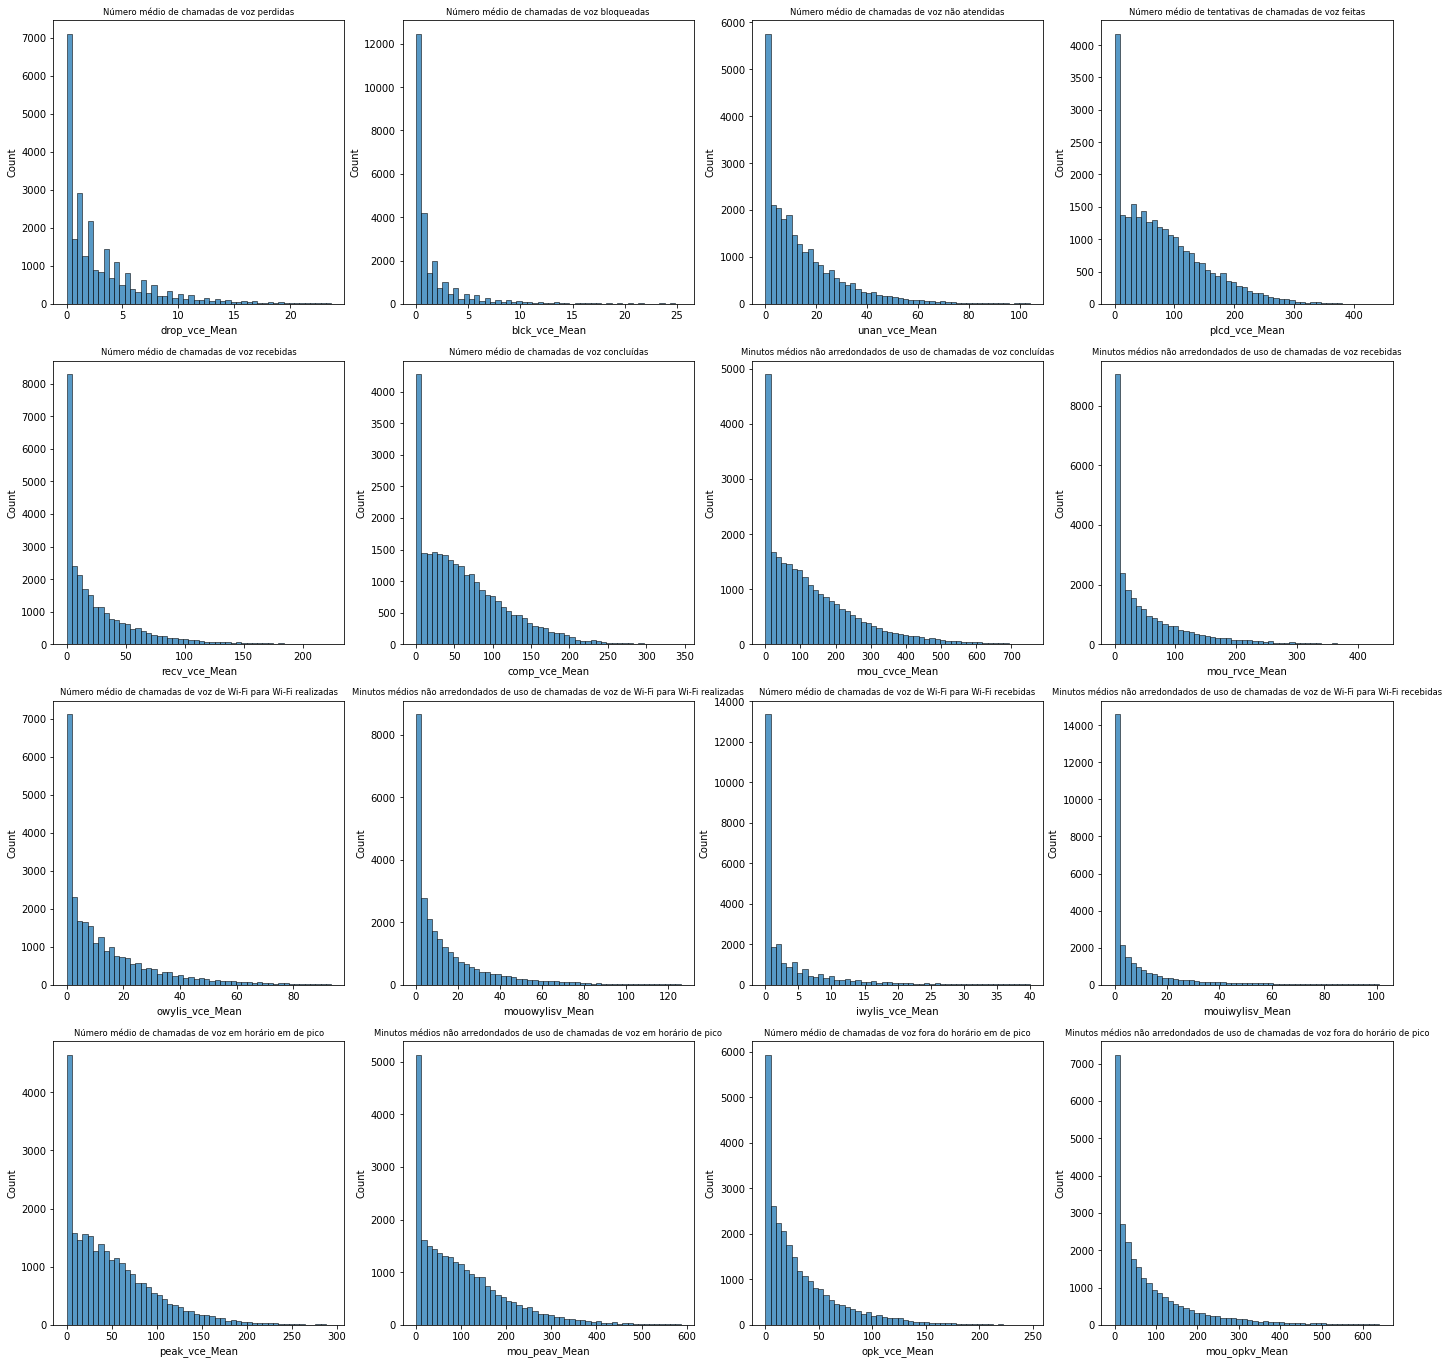

In [231]:
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
for name, ax in zip(chamadas_voz.keys(), axes.flatten()):
  ax.set_title(chamadas_voz[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

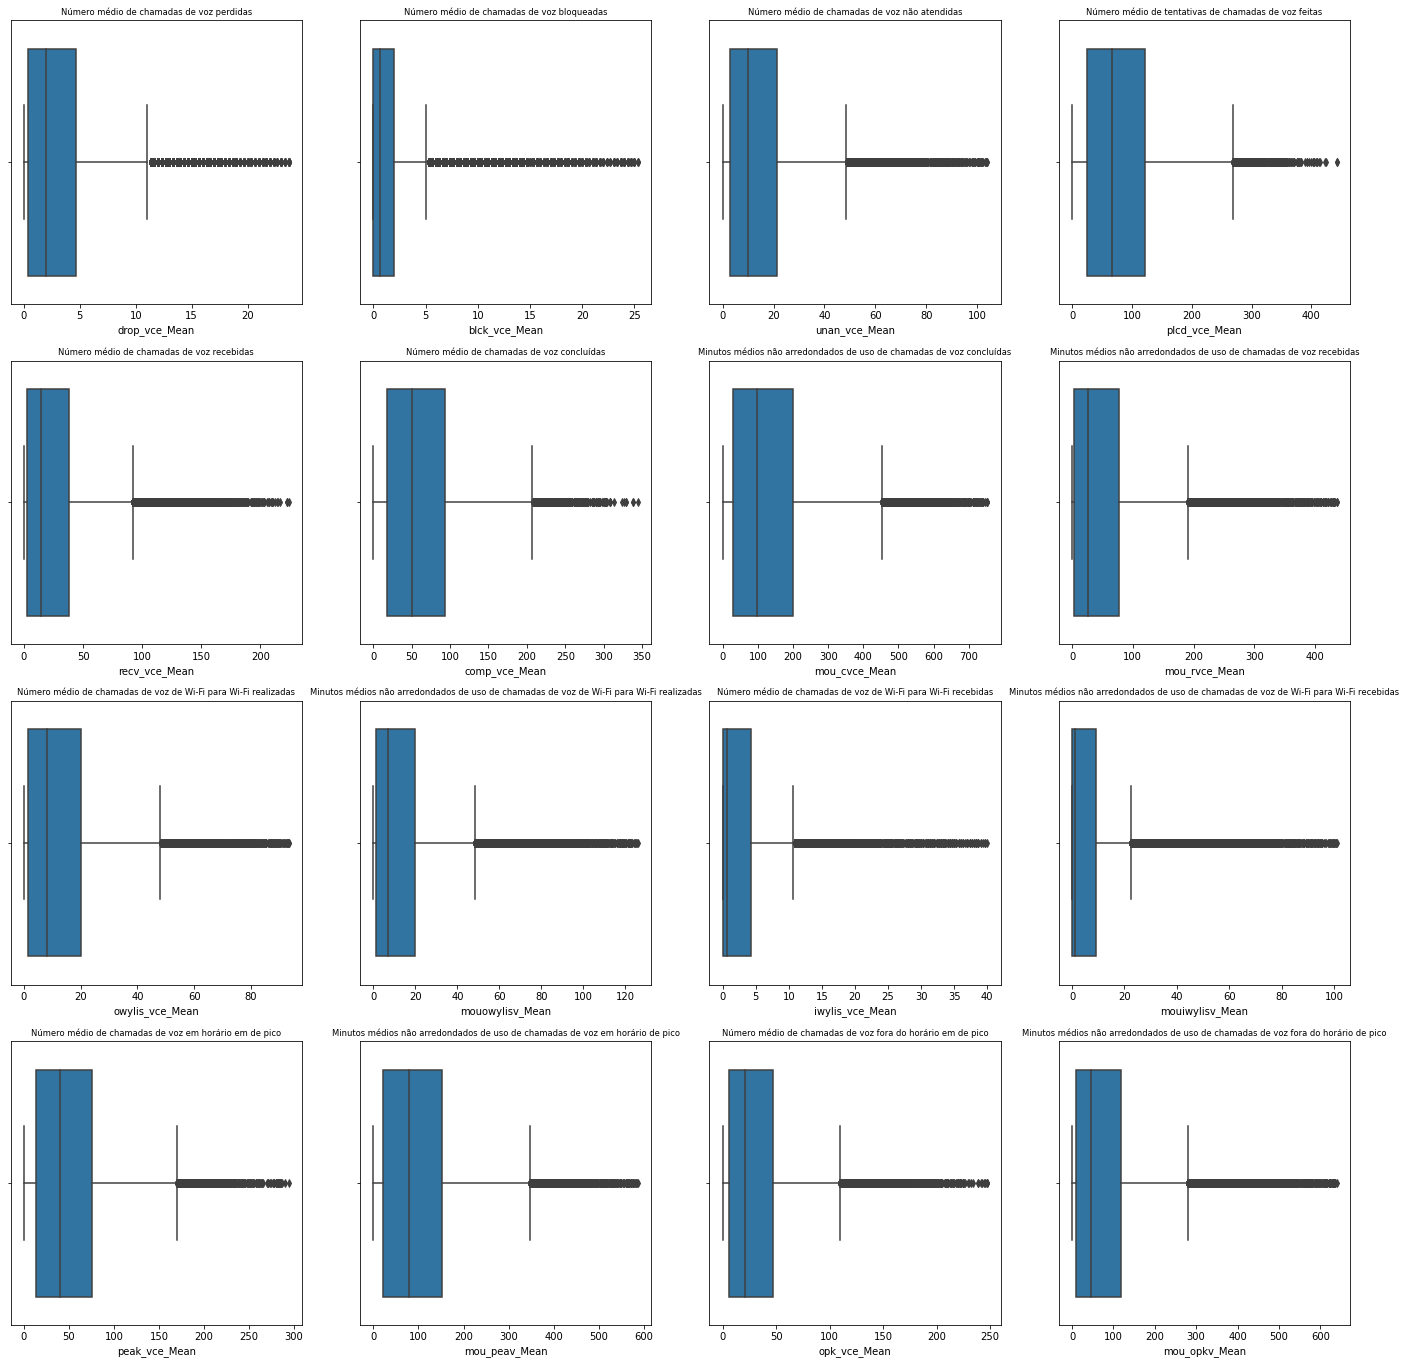

In [232]:
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
for name, ax in zip(chamadas_voz.keys(), axes.flatten()):
  ax.set_title(chamadas_voz[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- Os dados são consistentes com a ideia de poucas ligações por mês por cliente.

***Chamadas de Dados***

In [233]:
df[chamadas_dados].describe().T

,count,mean,std,min,25%,50%,75%,max
drop_dat_Mean,26407.0,0.005049,0.060849,0.0,0.0,0.0,0.0,1.666667
blck_dat_Mean,26407.0,0.001931,0.040826,0.0,0.0,0.0,0.0,2.333333
unan_dat_Mean,26407.0,0.006842,0.059906,0.0,0.0,0.0,0.0,1.000000
plcd_dat_Mean,26407.0,0.121824,0.692437,0.0,0.0,0.0,0.0,14.333333
comp_dat_Mean,26407.0,0.108002,0.646934,0.0,0.0,0.0,0.0,14.333333
mou_cdat_Mean,26407.0,0.200481,1.477331,0.0,0.0,0.0,0.0,46.240000
peak_dat_Mean,26407.0,0.052145,0.349965,0.0,0.0,0.0,0.0,8.333333
mou_pead_Mean,26407.0,0.090649,0.732172,0.0,0.0,0.0,0.0,17.113333
opk_dat_Mean,26407.0,0.055856,0.386664,0.0,0.0,0.0,0.0,9.333333
mou_opkd_Mean,26407.0,0.109832,0.959835,0.0,0.0,0.0,0.0,31.590000


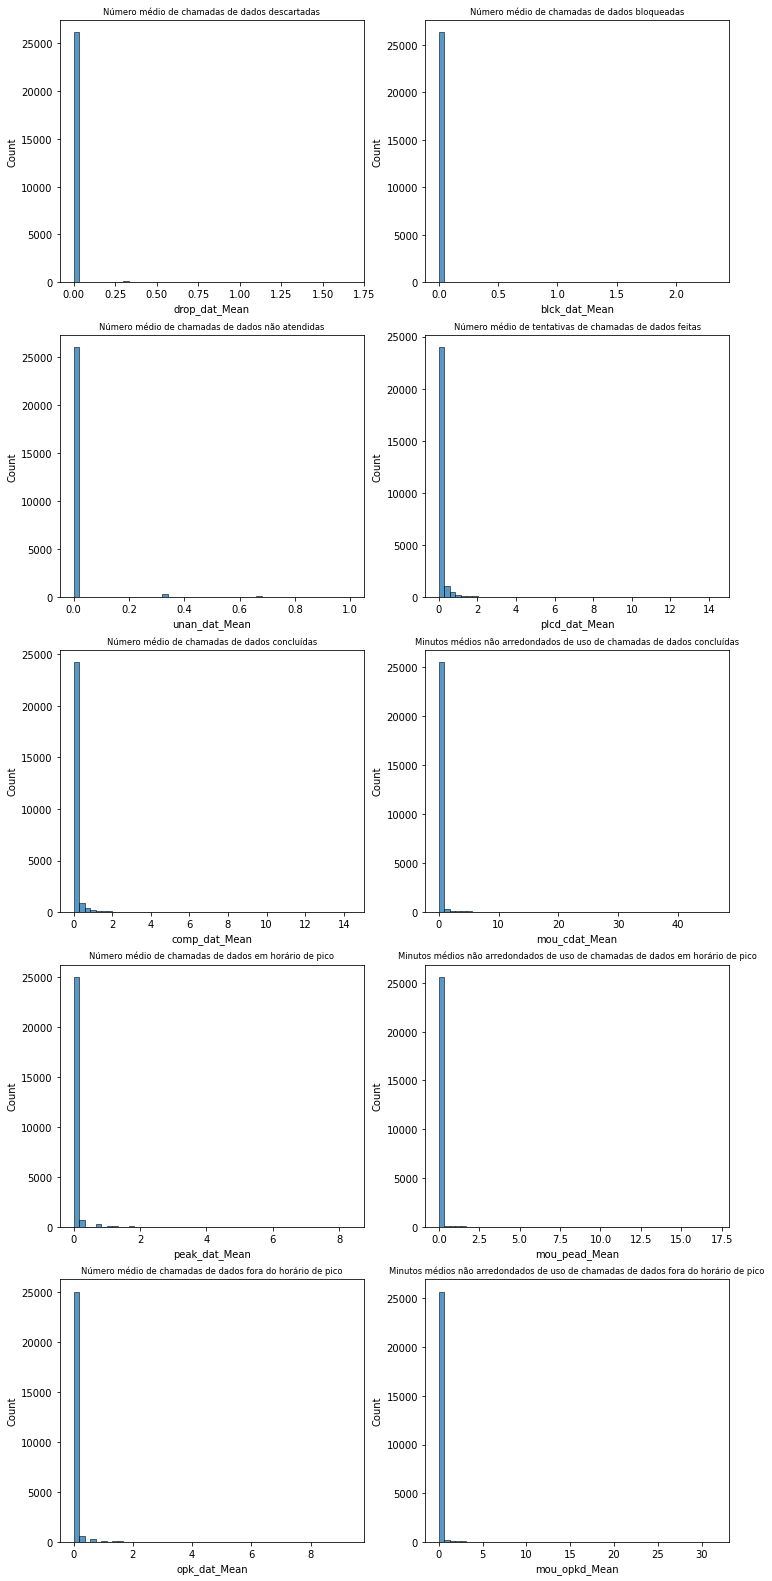

In [234]:
fig, axes = plt.subplots(5, 2, figsize=(12, 28))
for name, ax in zip(chamadas_dados.keys(), axes.flatten()):
  ax.set_title(chamadas_dados[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

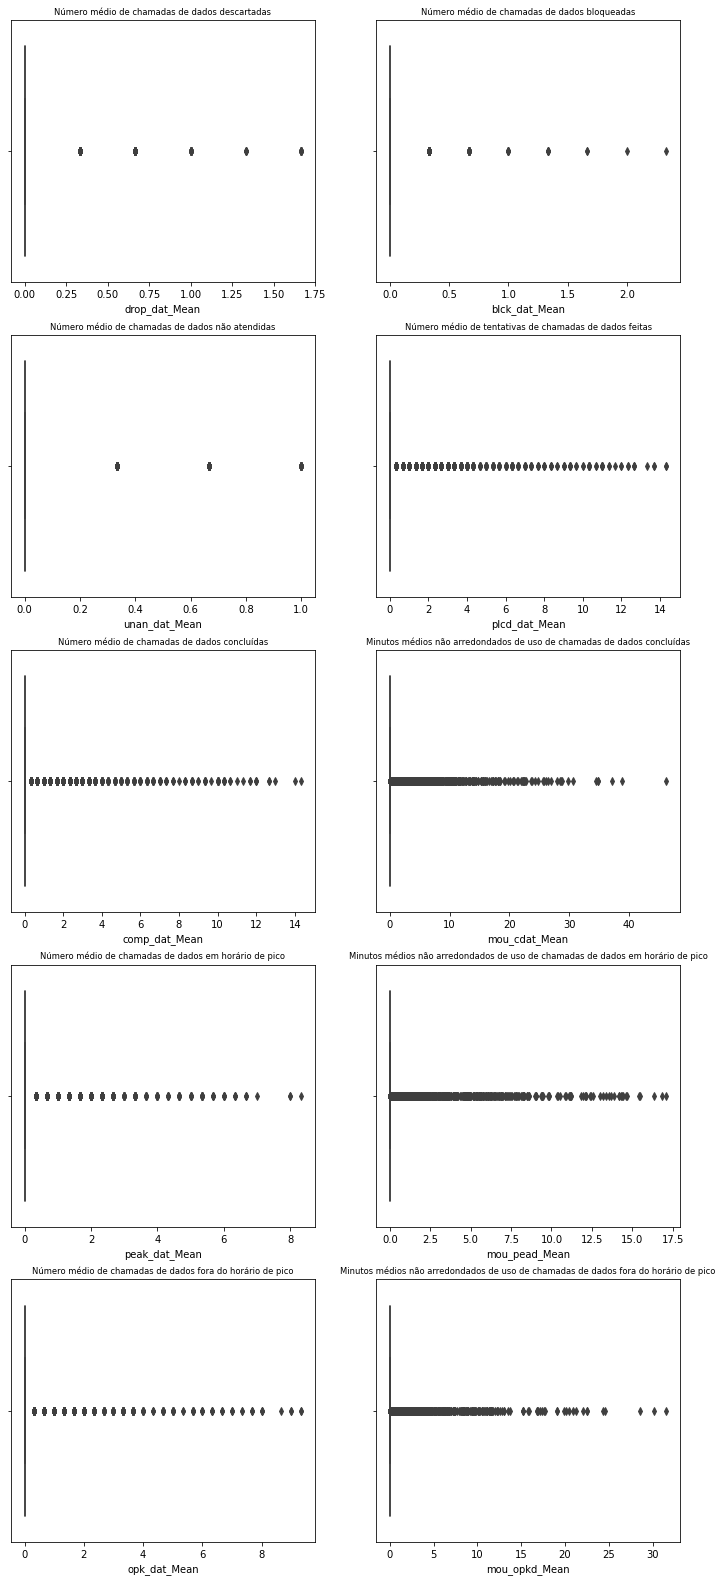

In [235]:
fig, axes = plt.subplots(5, 2, figsize=(12, 28))
for name, ax in zip(chamadas_dados.keys(), axes.flatten()):
  ax.set_title(chamadas_dados[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- A maioria dos clientes não fazem chamadas de dados.

***Chamadas para o SAC***

In [236]:
df[chamadas_sac].describe().T

,count,mean,std,min,25%,50%,75%,max
custcare_Mean,26407.0,0.667550,1.603945,0.0,0.0,0.0,0.333333,12.333333
cc_mou_Mean,26407.0,1.251427,3.147165,0.0,0.0,0.0,0.660000,24.753333


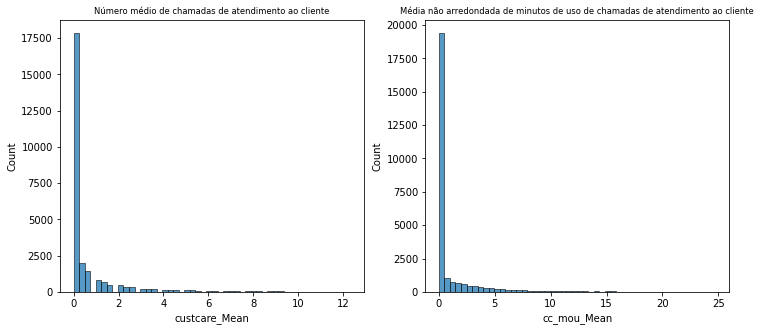

In [237]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for name, ax in zip(chamadas_sac.keys(), axes.flatten()):
  ax.set_title(chamadas_sac[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

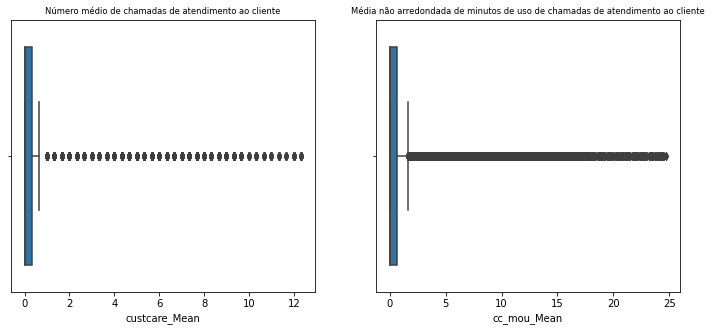

In [238]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for name, ax in zip(chamadas_sac.keys(), axes.flatten()):
  ax.set_title(chamadas_sac[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- Poucos clientes usam o SAC da empresa.

***Residencial***

In [239]:
df[residencial].describe().T

,count,mean,std,min,25%,50%,75%,max
uniqsubs,26407.0,1.418109,0.571770,1.000000,1.000000,1.000000,2.000000,3.000000
actvsubs,26407.0,1.280456,0.449231,1.000000,1.000000,1.000000,2.000000,2.000000
area,26407.0,9.595967,5.524396,0.000000,4.000000,11.000000,14.000000,18.000000
ownrent,26407.0,0.986576,0.015060,0.969681,0.969681,1.000000,1.000000,1.000000
lor,26407.0,5.395709,2.870458,0.000000,3.000000,6.177238,6.177238,14.000000
dwlltype,26407.0,0.311155,0.352631,0.000000,0.000000,0.283914,0.283914,1.000000
marital,26407.0,0.833093,0.967879,0.000000,0.000000,0.000000,2.000000,3.000000
adults,26407.0,2.290253,0.916471,1.000000,2.000000,2.530326,2.530326,5.000000
numbcars,26407.0,1.515446,0.325720,1.000000,1.567563,1.567563,1.567563,2.000000
kid0_2,26407.0,0.000872,0.005903,0.000000,0.000000,0.000000,0.000000,0.040827


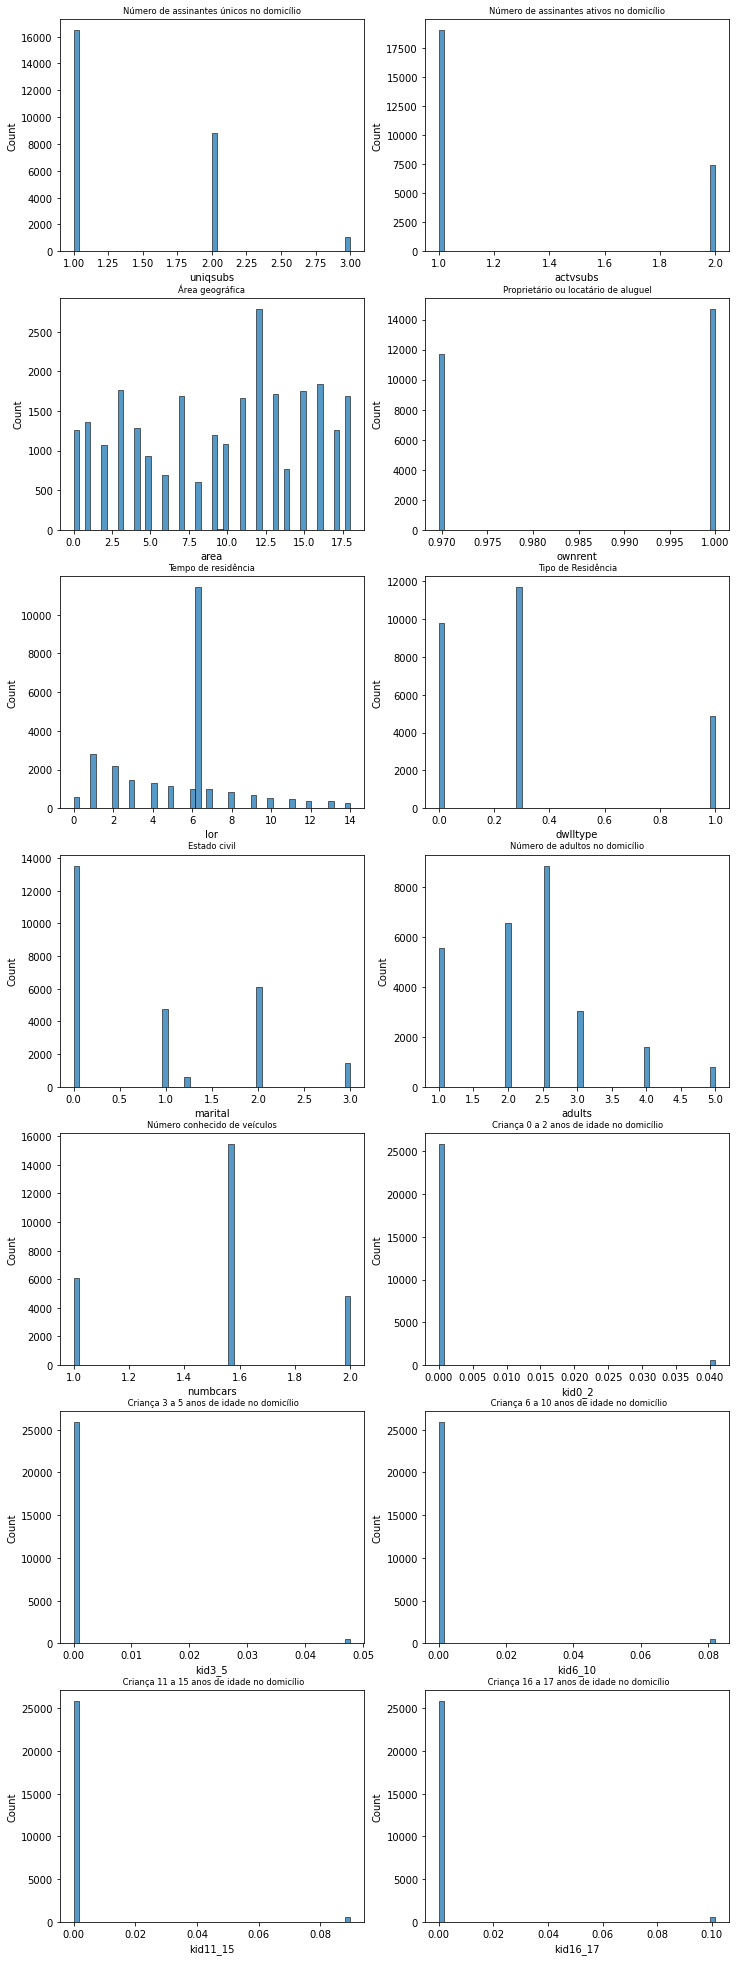

In [240]:
fig, axes = plt.subplots(7, 2, figsize=(12, 35))
for name, ax in zip(residencial.keys(), axes.flatten()):
  ax.set_title(residencial[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

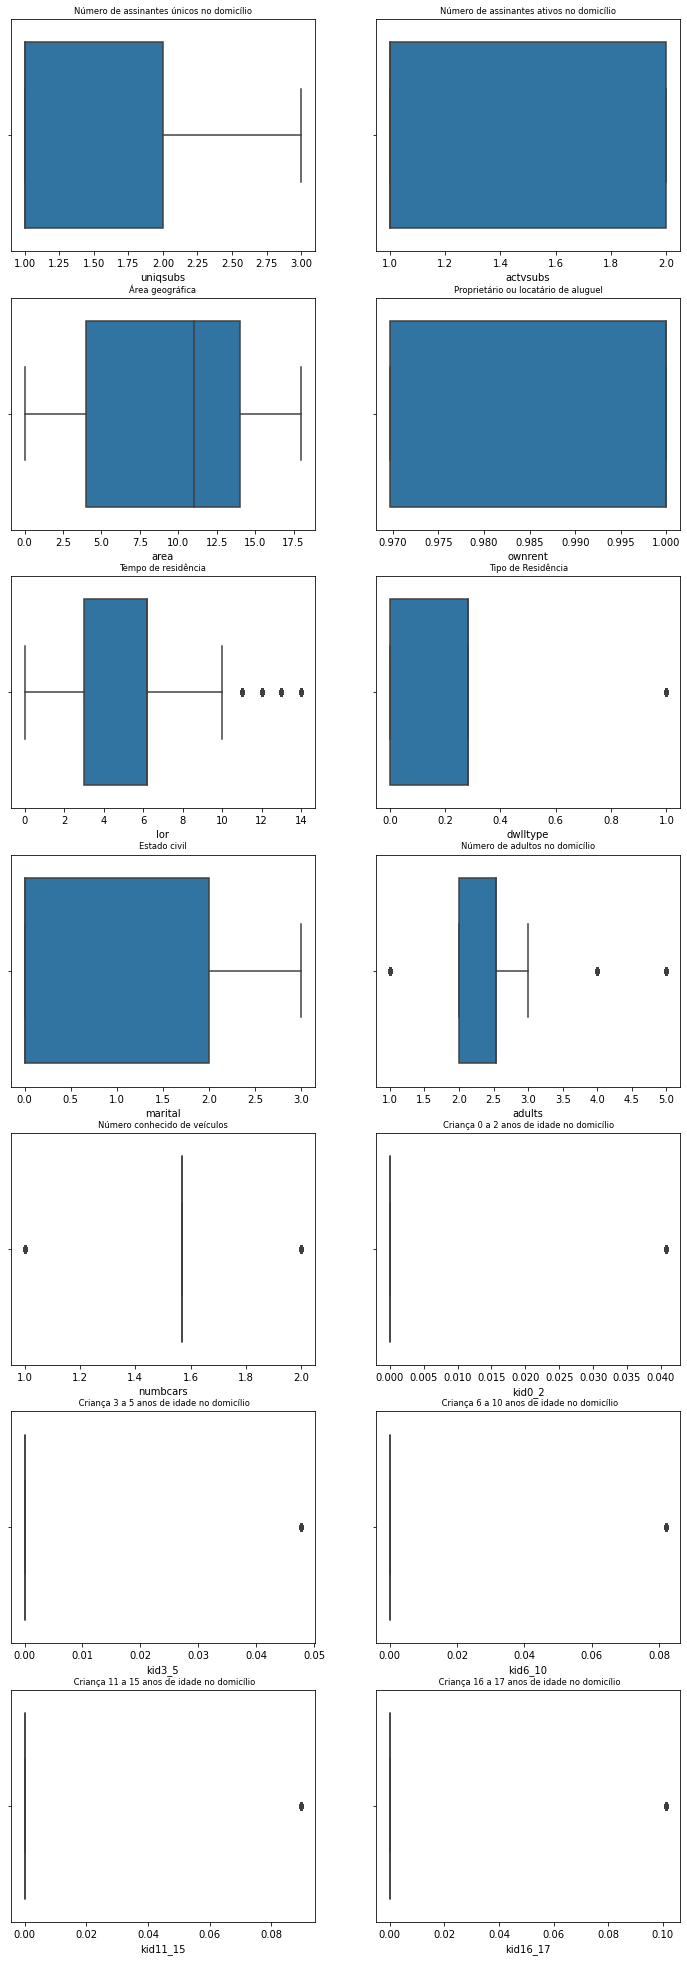

In [241]:
fig, axes = plt.subplots(7, 2, figsize=(12, 35))
for name, ax in zip(residencial.keys(), axes.flatten()):
  ax.set_title(residencial[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- Apenas um cliente por domicílio;
- A maioria dos clientes moram em casa própria;
- Moradores recém mudados e moradores de longa data fazem a maioria dos clientes;
- Os clientes moram em casas menores;
- Os clientes são em grande parte casados;
- Moram apenas duas pessoas na maioria das casas dos clientes;
- De 1 a 2 carros por residência;
- Os filhos dos clientes são estão na adolescência, em média.

***Info***

In [242]:
df[info].describe().T

,count,mean,std,min,25%,50%,75%,max
months,26407.0,17.593403,7.271046,6.000000,12.00000,16.00000,23.00000,38.00000
new_cell,26407.0,0.227250,0.383262,0.000000,0.00000,0.00000,0.50000,1.00000
refurb_new,26407.0,0.999995,0.000887,0.855939,1.00000,1.00000,1.00000,1.00000
hnd_price,26407.0,104.852394,56.169970,9.989998,59.98999,129.98999,149.98999,199.98999
eqpdays,26407.0,421.117580,207.988180,-5.000000,278.00000,388.00000,574.00000,904.00000


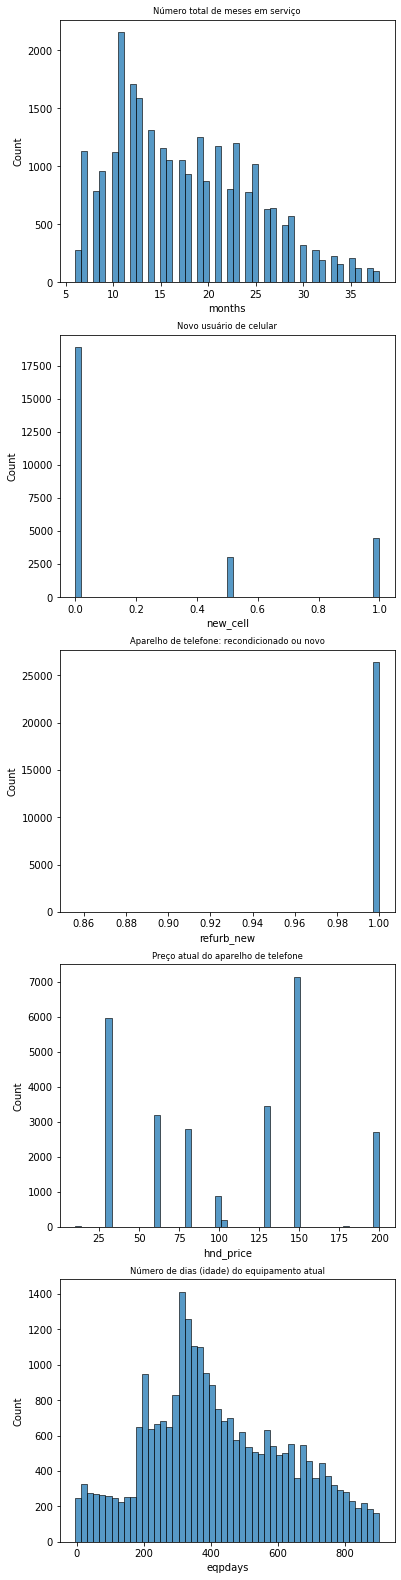

In [243]:
fig, axes = plt.subplots(5, 1, figsize=(6, 28))
for name, ax in zip(info.keys(), axes.flatten()):
  ax.set_title(info[name], fontsize='small')
  sns.histplot(x=name, data=df, bins=50, ax=ax)
plt.show()

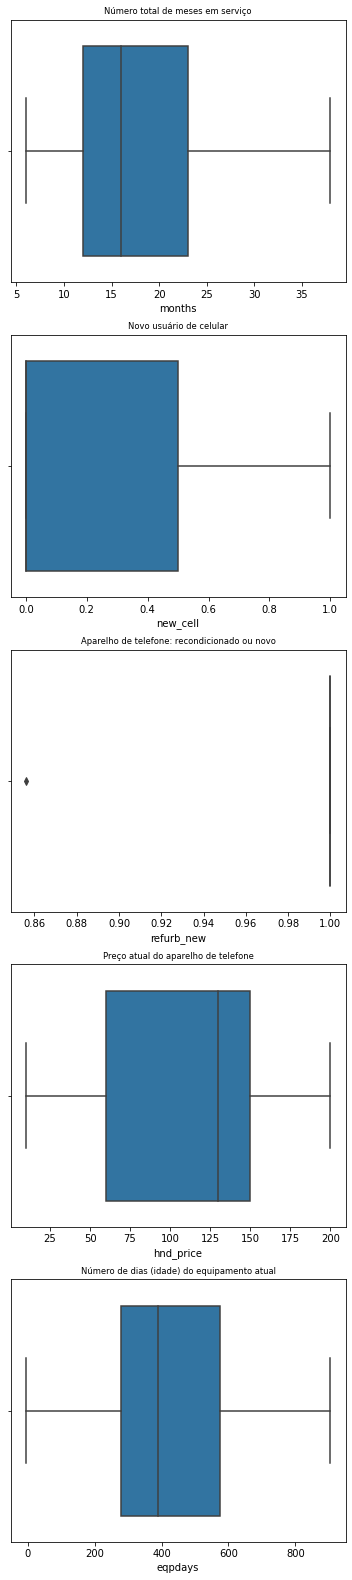

In [244]:
fig, axes = plt.subplots(5, 1, figsize=(6, 28))
for name, ax in zip(info.keys(), axes.flatten()):
  ax.set_title(info[name], fontsize='small')
  sns.boxplot(x=name, data=df, ax=ax)
plt.show()

- Depois de 10 meses de uso, a quantidade de clientes diminui exponencialmente;
- A maioria dos aparelhos são novos, mas temos alguns reformados;
- Na maioria aparelhos baratos.

In [245]:
# Porcentagem de clientes que cancelaram o serviço
round(df['churn'].sum() / df['churn'].count(), 3)

0.51

**Histogramas separados pelo churn**

***Financeiro***

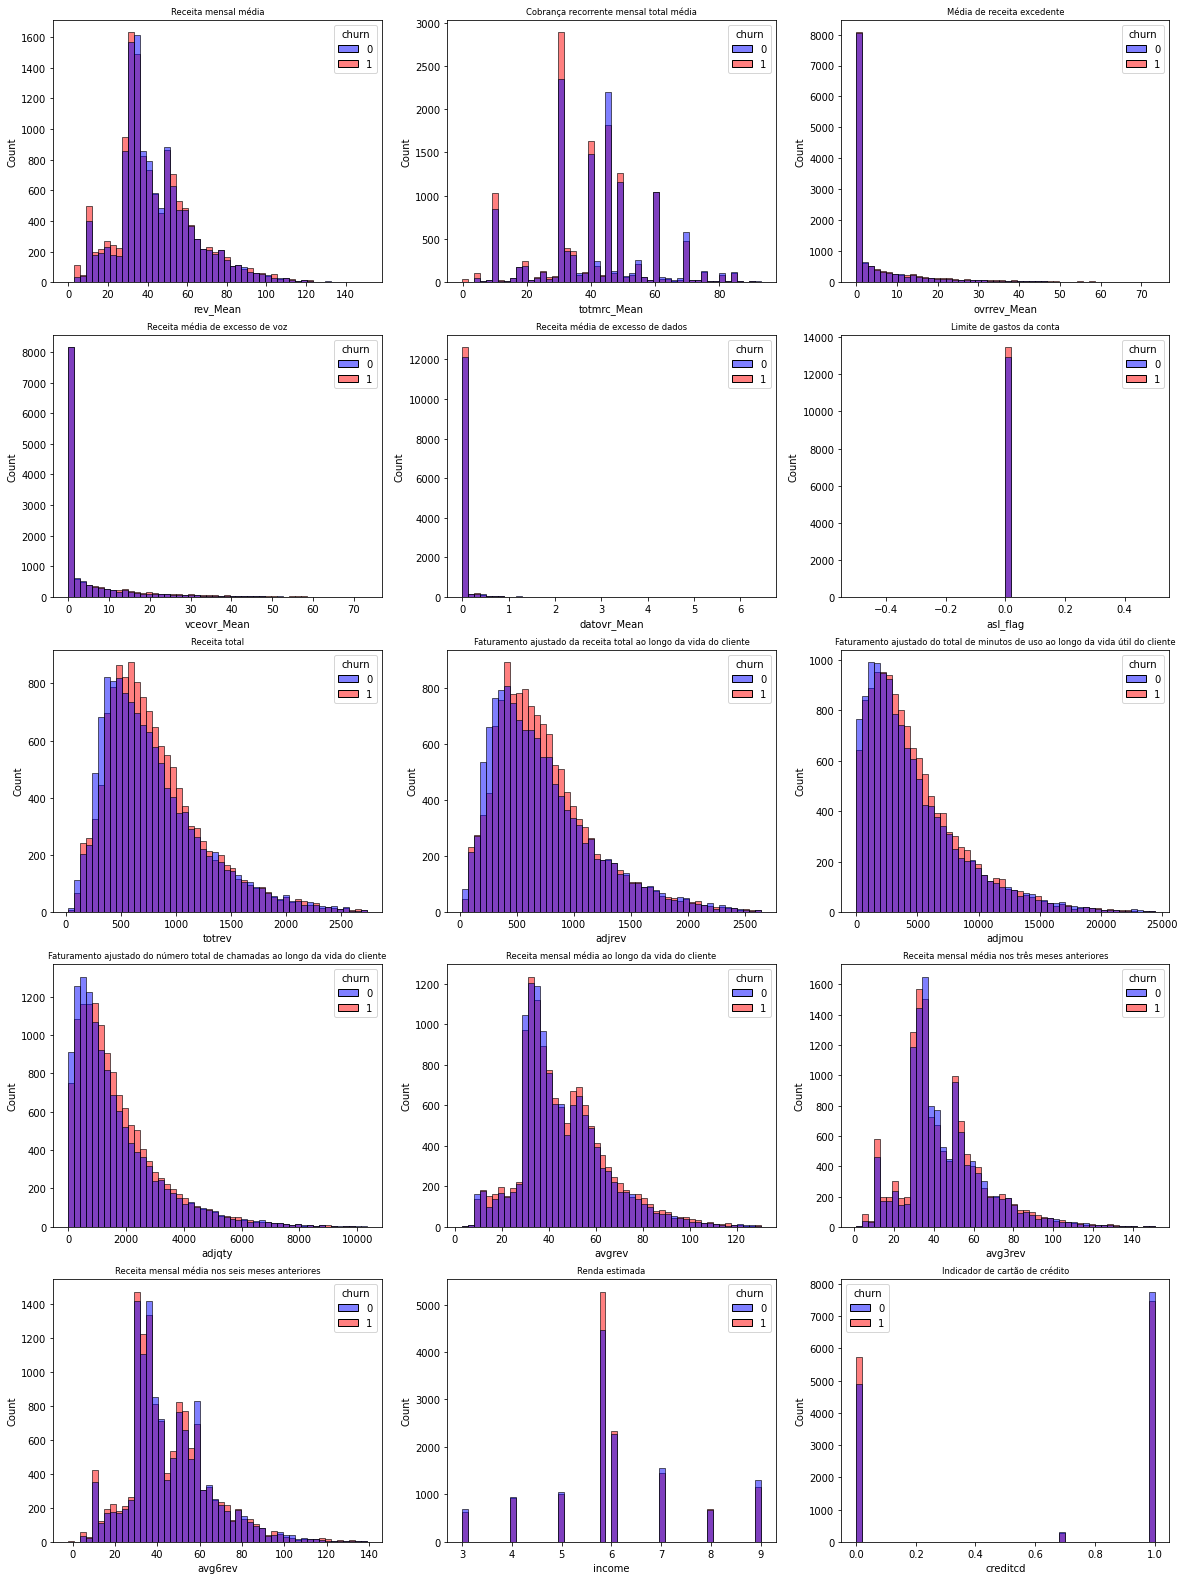

In [246]:
fig, axes = plt.subplots(5, 3, figsize=(20, 28))
for name, ax in zip(financeiro.keys(), axes.flatten()):
  ax.set_title(financeiro[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O churn é significativo quando a cobrança recorrente mensal média é em torno de $30;

- Quando a receita total do cliente passa de aproximadamente $580, o churn se torna se torna constante;

- Quando a receita média dos 3 meses anteriors é em torno de $40, há uma leve chance de churn;

- Clientes com Renda estimada 6 tem maior tendência de churn.

***Chamadas Geral***

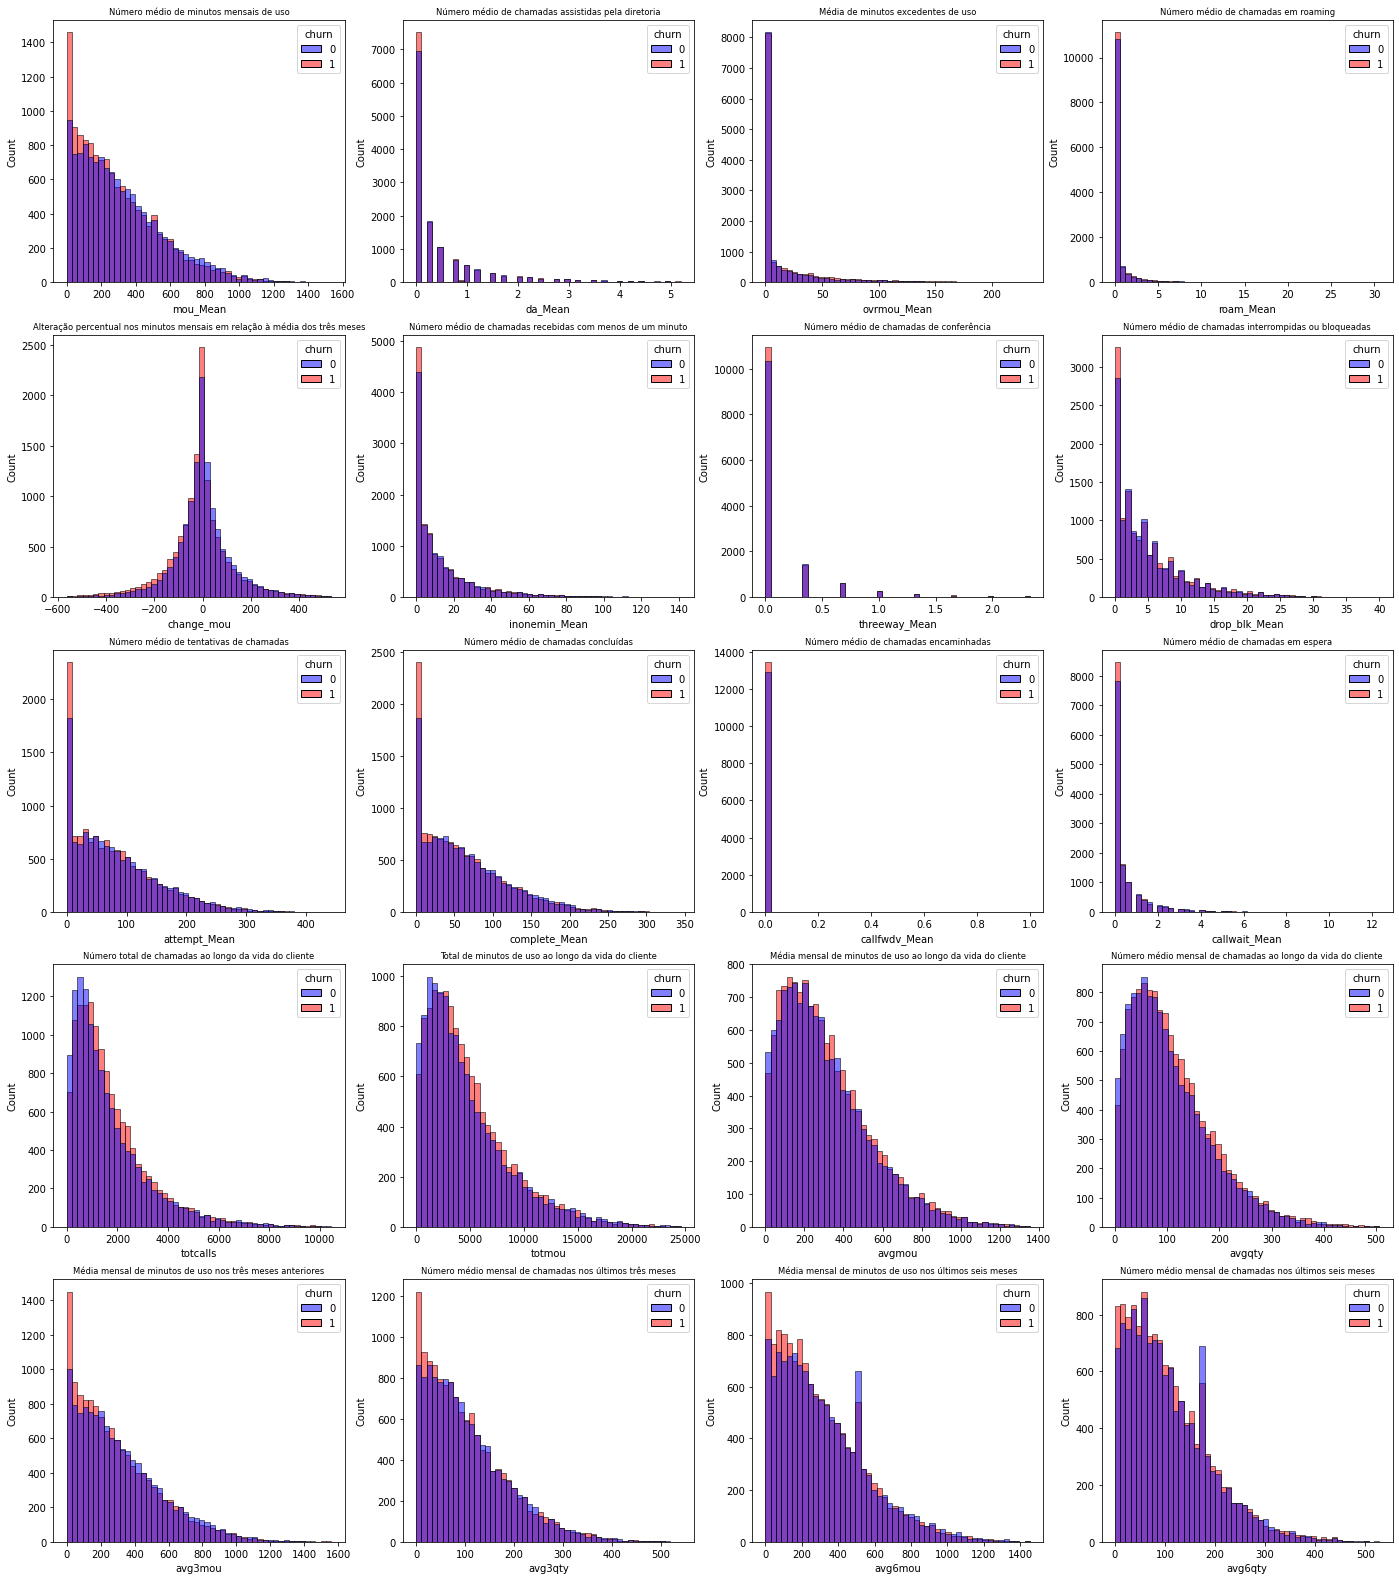

In [247]:
fig, axes = plt.subplots(5, 4, figsize=(24, 28))
for name, ax in zip(chamadas_geral.keys(), axes.flatten()):
  ax.set_title(chamadas_geral[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O churn é expressivo quando o número de minutos mensais e consequentemente de chamadas é muito baixo;
- A média mensal dos últimos 3 meses é suficiente para observar o churn;
- O churn é mais provável se houver queda do percentual nos minutos mensais em relação a média dos últimos 3 meses.

***Chamadas de Voz***

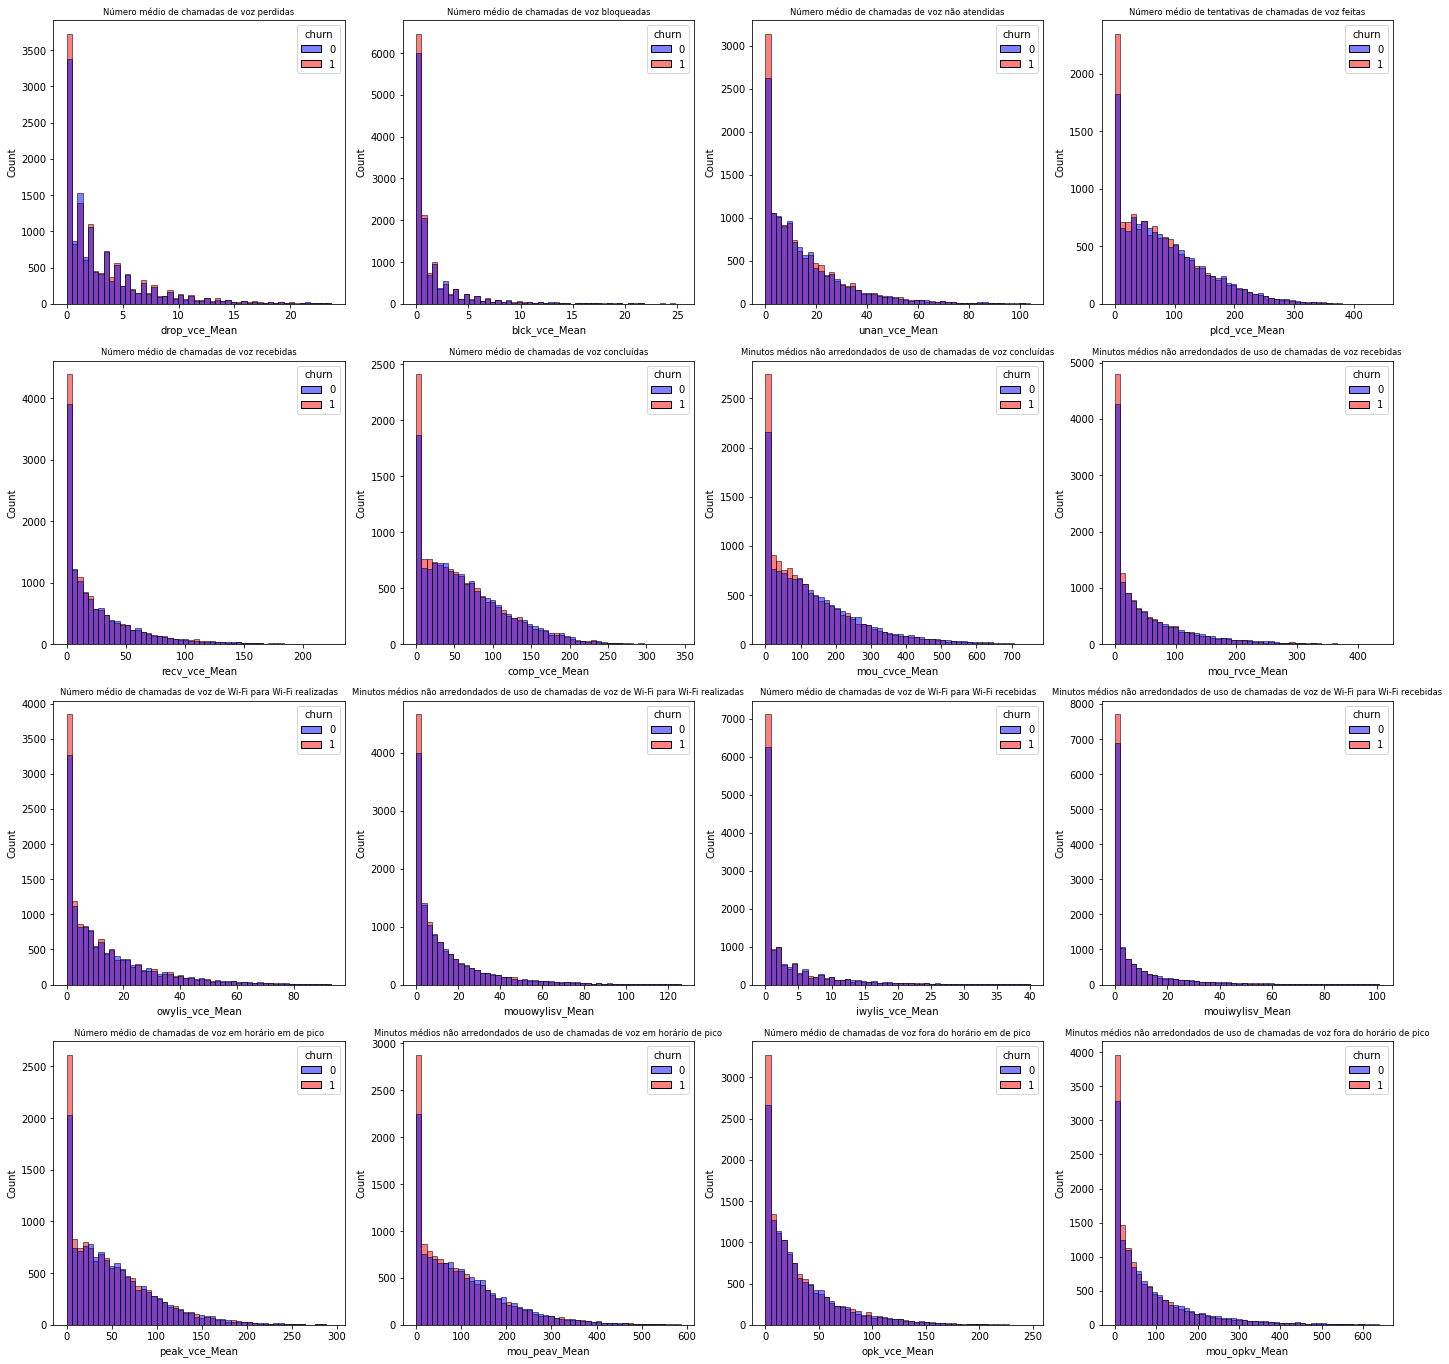

In [248]:
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
for name, ax in zip(chamadas_voz.keys(), axes.flatten()):
  ax.set_title(chamadas_voz[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O número médio de tentativas de chamadas baixo tem churn maior;
- Um baixo número médio de chamadas de voz recebidas de wi-fi para wi-fi resulta em churn;
- O horário de pico não é um fator para o churn, em ambos o churn é expressivo apenas se a quantidade de minutos for baixa.

***Chamadas de Dados***

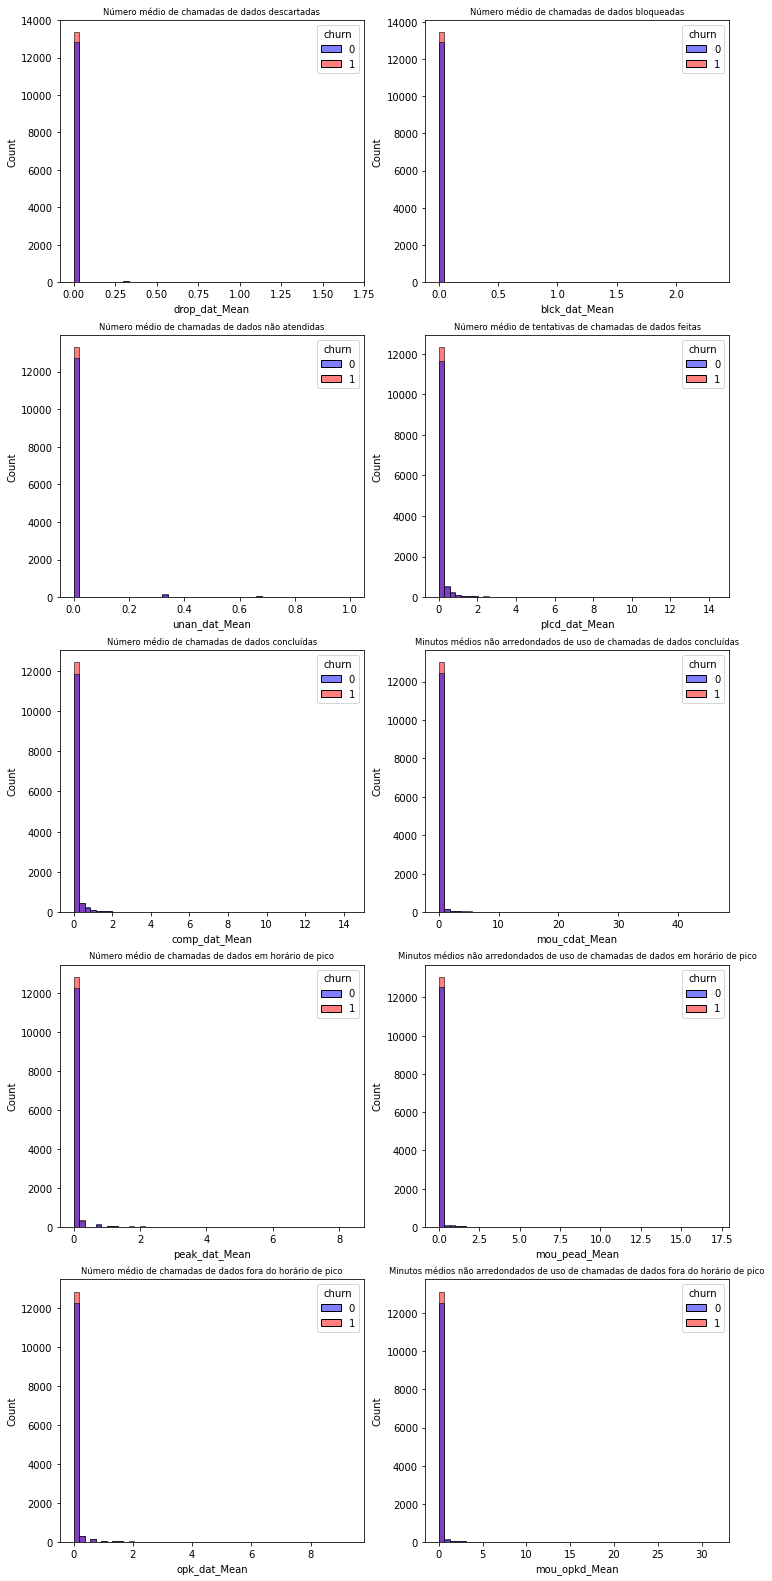

In [249]:
fig, axes = plt.subplots(5, 2, figsize=(12, 28))
for name, ax in zip(chamadas_dados.keys(), axes.flatten()):
  ax.set_title(chamadas_dados[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O uso de cahadadas de dados não acarretam churn significativo.

***Chamadas para o SAC***

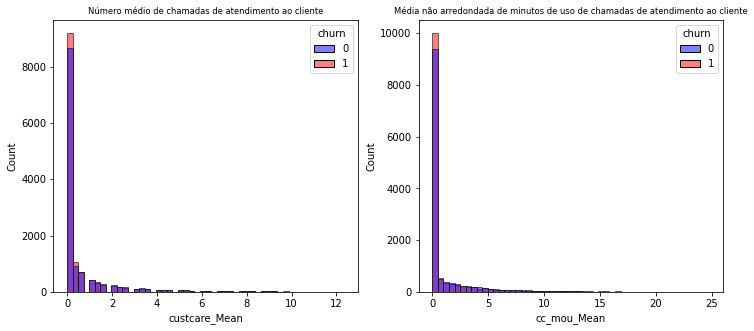

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for name, ax in zip(chamadas_sac.keys(), axes.flatten()):
  ax.set_title(chamadas_sac[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- Quando há poucas ligações para o SAC da empresa existe churn.

***Residencial***

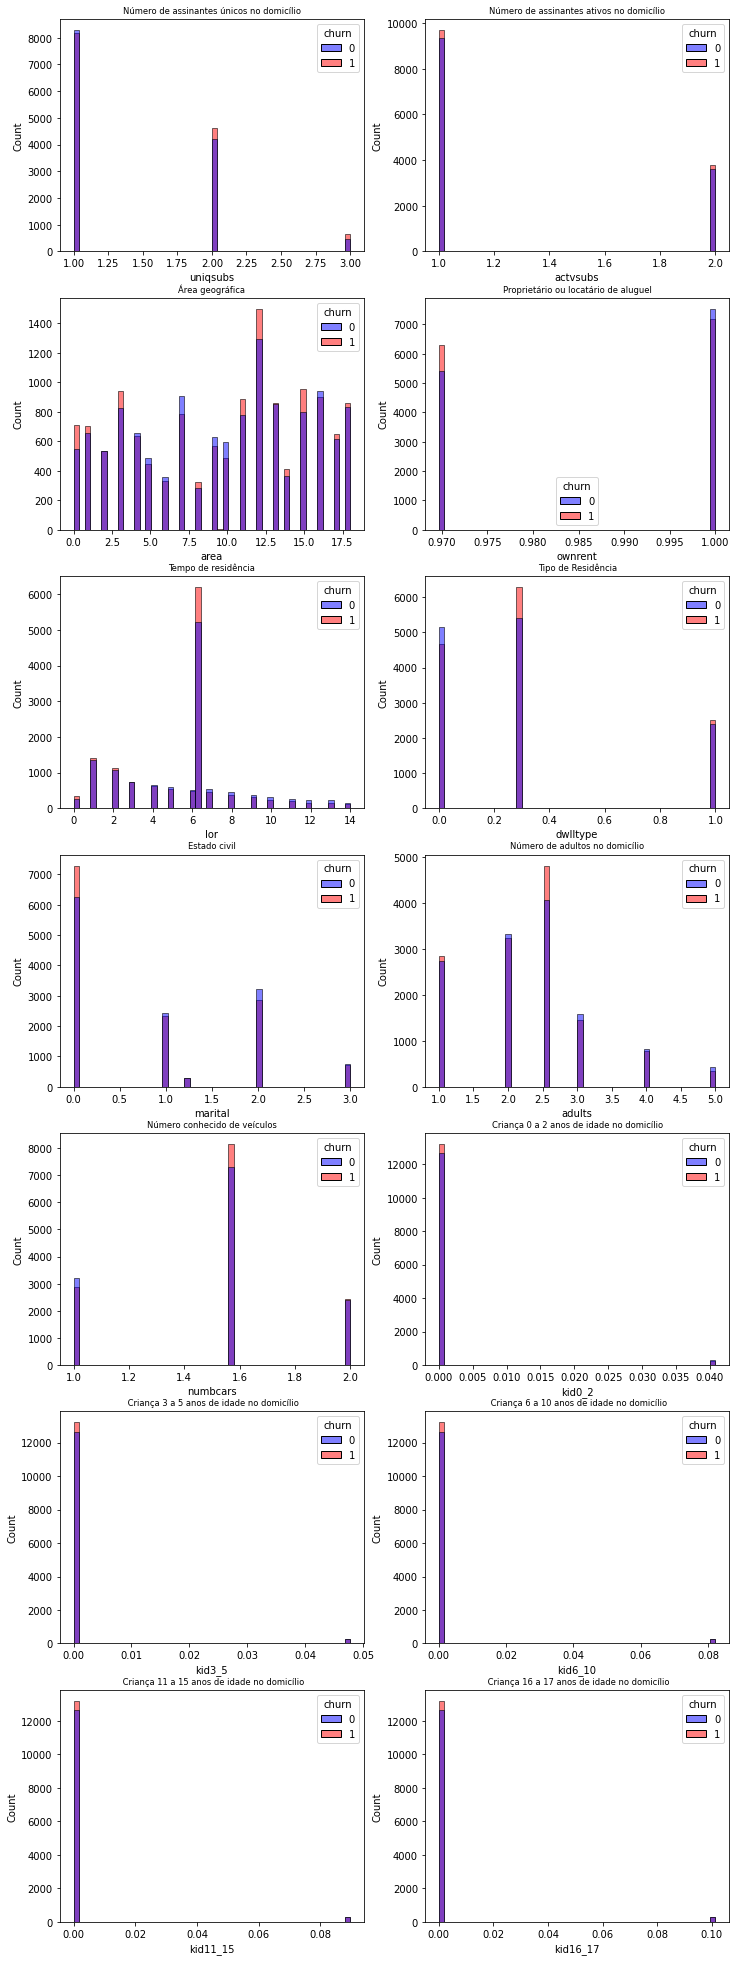

In [251]:
fig, axes = plt.subplots(7, 2, figsize=(12, 35))
for name, ax in zip(residencial.keys(), axes.flatten()):
  ax.set_title(residencial[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O churn é eminente se o número de assinantes no domicílio for exatamente dois.
- O churn é significativo em Northwest/Rocky Mountain, New England, Southwest, New York City, South Florida, California North e  Los Angeles;
- Se o tempo de residência do cliente for até 5 meses, ele tende ao churn;

***Info***

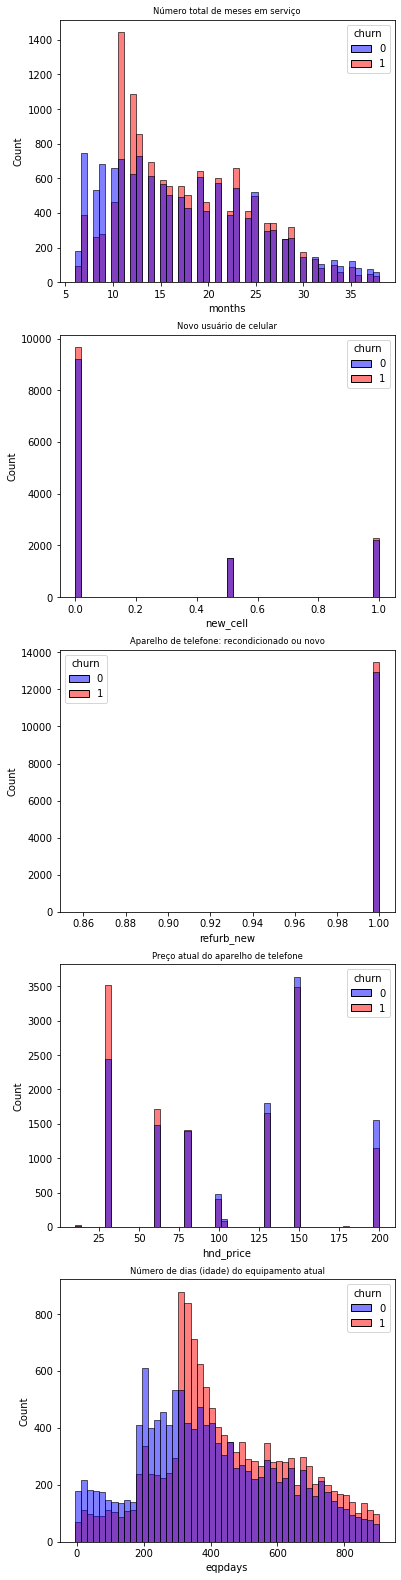

In [252]:
fig, axes = plt.subplots(5, 1, figsize=(6, 28))
for name, ax in zip(info.keys(), axes.flatten()):
  ax.set_title(info[name], fontsize='small')
  sns.histplot(x=name, hue='churn', palette=['blue', 'red'], data=df, bins=50, ax=ax)
plt.show()

- O churn é mais provável de 10 a 20 meses em serviço;
- Se o telefone do cliente for recondicionado, o churn é levente maior;
- Donos de aparelhos mais baratos tem muito mais churn;
- Se os aparelhos tem mais de 250 dias o churn aumenta sensivelmente, sugerindo que os clientes associam defeitos no aparelho com serviço ruim ou simplesmente desistem do serviço por não terem mais um aparelho.

## Correlação entre as variáveis

Vamos analizar a relação entre as variáveis que demonstram churn.

Financeiro:
- rev_Mean
- totmrc_Mean
- asl_flag
- totrev
- adjrev
- adjmou
- adjqty
- avgrev
- avg3rev
- avg6rev
- income
- creditcd

Chamadas Geral:
- mou_Mean
- change_mou
- inonemin_Mean
- drop_blk_Mean
- attempt_Mean
- complete_Mean
- callwait_Mean
- totcalls
- totmou
- avgmou
- avgqty
- avg3mou
- avg3qty
- avg6mou
- avg6qty

Chamadas de Voz
- drop_vce_Mean
- blck_vce_Mean
- unan_vce_Mean
- bplcd_vce_Mean
- recv_vce_Mean
- comp_vce_Mean
- mou_cvce_Mean
- mou_rvce_Mean
- owylis_vce_Mean
- mouowylisv_Mean
- iwylis_vce_Mean
- mouiwylisv_Mean
- peak_vce_Mean
- mou_peav_Mean
- opk_vce_Mean
- mou_opkv_Mean

SAC:
- custcare_Mean
- cc_mou_Mean

Residencial:
- uniqsubs
- area
- ownrent
- lor
- dwlltype
- marital
- adults
- numbcars

Info:
- months
- hnd_price
- eqpdays

In [253]:
hard_churn = ['rev_Mean', 'totmrc_Mean', 'asl_flag', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avg3rev', 'avg6rev', 'income', 'creditcd',
              'mou_Mean', 'change_mou', 'inonemin_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callwait_Mean', 'totcalls', 'totmou', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty',
              'drop_vce_Mean', 'blck_vce_Mean', 'unan_vce_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'mou_opkv_Mean',
              'custcare_Mean', 'cc_mou_Mean',
              'uniqsubs', 'area', 'ownrent', 'lor', 'dwlltype', 'marital', 'adults', 'numbcars', 
              'months', 'hnd_price', 'eqpdays']

**Heatmap**

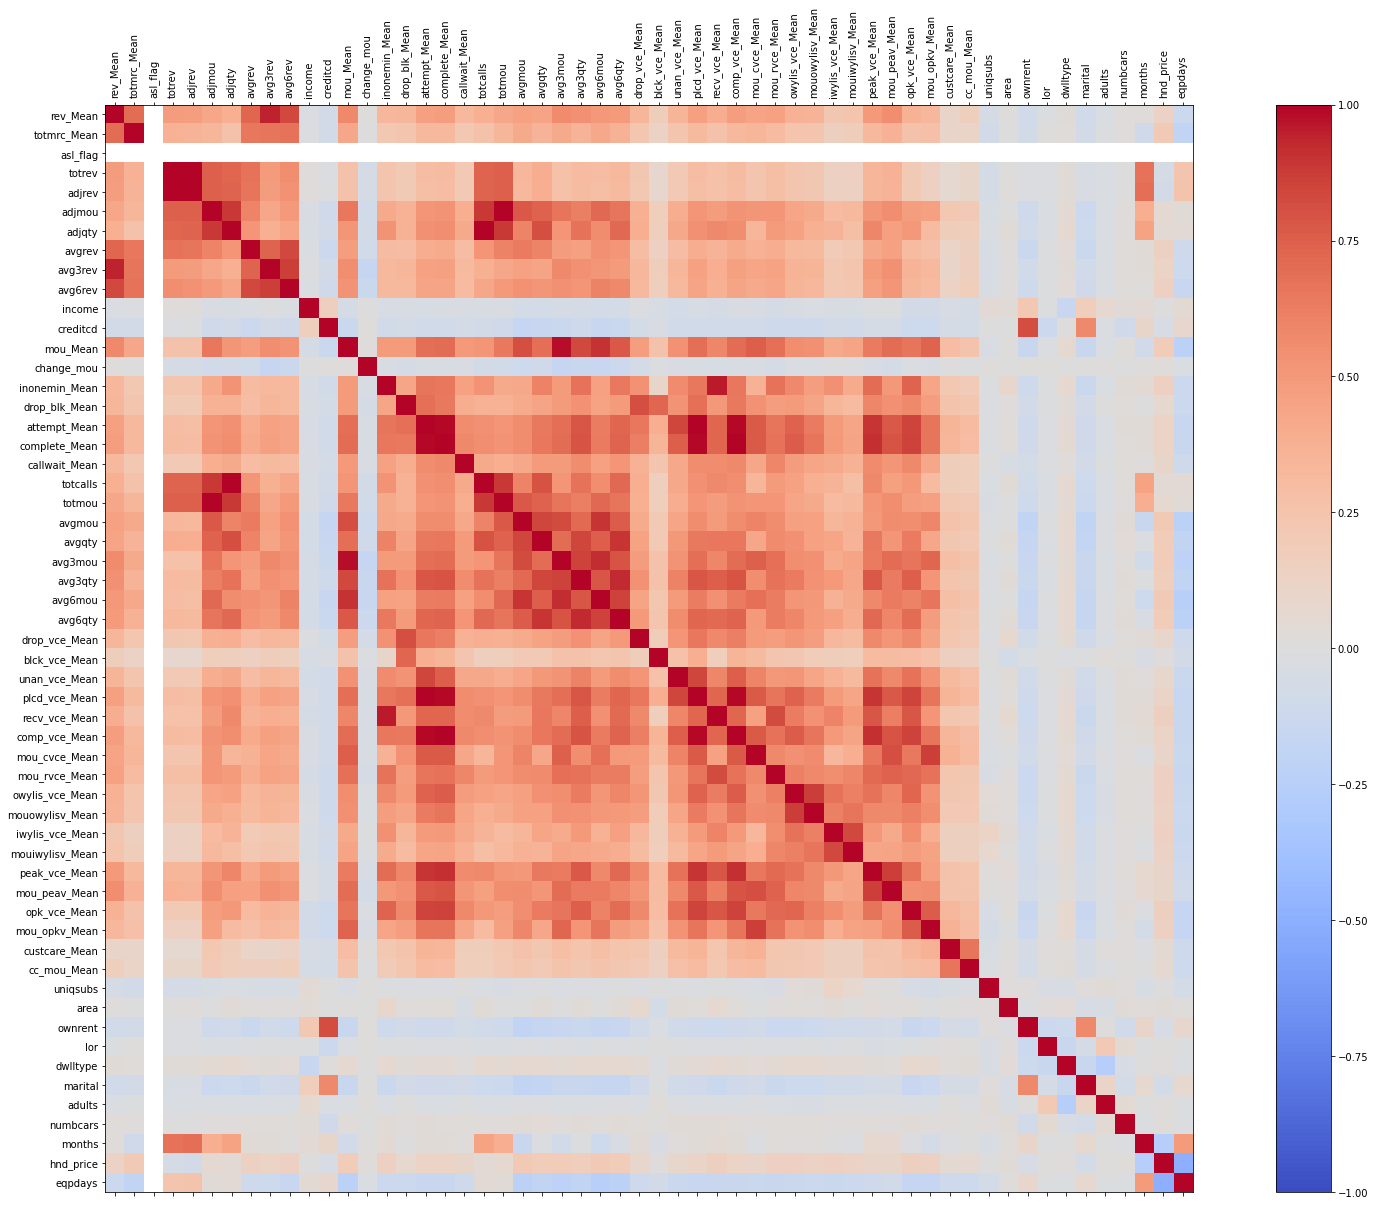

In [254]:
corr = df[hard_churn].corr()
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df[hard_churn].columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df[hard_churn].columns)
ax.set_yticklabels(df[hard_churn].columns)
plt.show()

In [255]:
iters = range(len(corr.columns) - 1)
corr_cols = []
corr_rows = []
for i in iters:
    for j in range(i+1):
        item = corr.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)
        if val >= 0.9:
          print(f"{list(item.index)[0]}, {list(item.columns)[0]}: {round(item.values[0][0], 2)}")
          corr_cols.append(list(item.columns)[0])
          corr_rows.append(list(item.index)[0])

totrev, adjrev: 1.0
rev_Mean, avg3rev: 0.94
attempt_Mean, complete_Mean: 0.99
adjqty, totcalls: 1.0
adjmou, totmou: 1.0
mou_Mean, avg3mou: 0.98
mou_Mean, avg6mou: 0.9
avg3mou, avg6mou: 0.92
avg3qty, avg6qty: 0.93
attempt_Mean, plcd_vce_Mean: 1.0
complete_Mean, plcd_vce_Mean: 0.99
inonemin_Mean, recv_vce_Mean: 0.96
attempt_Mean, comp_vce_Mean: 0.99
complete_Mean, comp_vce_Mean: 1.0
plcd_vce_Mean, comp_vce_Mean: 0.99
complete_Mean, peak_vce_Mean: 0.91
comp_vce_Mean, peak_vce_Mean: 0.91


Analisando o heatmap, podemos ver correlações positivas muito fortes em algumas variáveis, logo vamos excluir as seguntes para criarmos o nosso modelo de classificação:
- recv_vce_Mean
- adjrev
- avg6mou
- totmou
- avg6qty
- peak_vce_Mean
- totcalls
- complete_Mean
- plcd_vce_Mean
- avg3rev
- comp_vce_Mean
- avg3mou

In [256]:
drop_cols = list(set(corr_cols))
hard_churn_nocorr = [k for k in hard_churn if k not in drop_cols]

In [257]:
df[hard_churn_nocorr + ['churn', 'Customer_ID']].to_csv('/content/drive/MyDrive/Churn Analysis/Telecom_hard_churn_nocorr.csv', index=False)